In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import copy
from mod_smolagents import OpenAIServerModel
from mod_smolagents import CodeAgent
from smolagents import tool
# from mod_smolagents import tool
import json
import os

In [2]:
def get_model(
    api_key='',
):
    if api_key == '': api_key = input('Please enter your openai api key')
    model = OpenAIServerModel(
        model_id="gpt-5",
        api_key=api_key,
    )

    return model

In [3]:
model = get_model()

# Tools

## ask_user()

In [4]:
@tool
def ask_user(query: str) -> str:
    """Asks a user for clarification/preferences. Try to make it easy for the user. 
    For instance, when asking complex queries, you could let the user choose among itemized choices. 
    You could also make a default answer that the user could then edit.

    Args:
        query: The question to the user.
    Returns:
        answer: The user's answer to the query.
    """
    return input(query)

In [5]:
ask_user('hi how are you?')

hi how are you? good thank you


'good thank you'

## query_book()

In [154]:
import book_querying


@tool
def query_book(query: str) -> str:
    """Query the contents of an introductory physics book. 
    Internally an LLM agent system determines which book chapter is the most relevant to the query. 
    The chapter's text is then analyzed to answer the query.

    Args:
        query: The question to the book.
    Returns:
        answer: The LLM agent system's answer to the query based on the contents of the most relevant book chapter.
    """
    answer = book_querying.query_book(
        query=query,
        # chapters_dict=CHAPTERS_DICT,
        verbose=True,
    )

    return answer

### examples

In [150]:
answer = query_book('what is the effect of a magnetic field on a moving charge?')
print(answer)

Your task is to determine what is the most relevant book chapter for a given query The book's table of contents (toc) and the query are given below:

<toc>
Chapter 0: Introduction and Review
Chapter 1: Conservation of Mass
Chapter 2: Conservation of Energy
Chapter 3: Conservation of Momentum
Chapter 4: Conservation of Angular Momentum
Chapter 5: Thermodynamics
Chapter 6: Waves
Chapter 7: Relativity
Chapter 8: Atoms and Electromagnetism
Chapter 9: Circuits
Chapter 10: Fields
Chapter 11: Electroma 

...

 ds
Chapter 11: Electromagnetism
Chapter 12: Optics
Chapter 13: Quantum Physics
Chapter 14: Additional Topics in Quantum Physics
</toc>

<query>
what is the effect of a magnetic field on a moving charge?
</query>

Provide your answer in the following format:

<thoughts>
Your reasoning on what is the query's topic and what book chapter may be the most related to it.
</thoughts>

<chapter_number>
A single integer representing the chapter number. Do not write any other text here.
</chapter_

In [149]:
answer = query_book('is it possible to travel in time?')
print(answer)

Your task is to determine what is the most relevant book chapter for a given query The book's table of contents (toc) and the query are given below:

<toc>
Chapter 0: Introduction and Review
Chapter 1: Conservation of Mass
Chapter 2: Conservation of Energy
Chapter 3: Conservation of Momentum
Chapter 4: Conservation of Angular Momentum
Chapter 5: Thermodynamics
Chapter 6: Waves
Chapter 7: Relativity
Chapter 8: Atoms and Electromagnetism
Chapter 9: Circuits
Chapter 10: Fields
Chapter 11: Electroma 

...

 Circuits
Chapter 10: Fields
Chapter 11: Electromagnetism
Chapter 12: Optics
Chapter 13: Quantum Physics
Chapter 14: Additional Topics in Quantum Physics
</toc>

<query>
is it possible to travel in time?
</query>

Provide your answer in the following format:

<thoughts>
Your reasoning on what is the query's topic and what book chapter may be the most related to it.
</thoughts>

<chapter_number>
A single integer representing the chapter number. Do not write any other text here.
</chapter_

# Applications

## simple kinematics problem

# Query
How much constant force is required for a mass of 1Kg to reach 10m/s in 10 s? Do not consider friction

# Additional information
- In the case of complex problems whose solutions can not be fully foreseen at first, try to pose simple and direct queries and iteratively build up the information you need.
- If appropriate, show a matplotlib or seaborn plot in your final answer.


╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ # Query                                                                                                         │
│ How much constant force is required for a mass of 1Kg to reach 10m/s in 10 s? Do not consider friction          │
│                                                                                                                 │
│ # Additional information                                                                                        │
│ - In the case of complex problems whose solutions can not be fully foreseen at first, try to pose simple and    │
│ direct queries and iteratively build up the information you need.                                               │
│ - If appropriate, show a matplotlib or seaborn plot in your final answer.                                       │
│                                                                                                                 │
╰─ OpenAIModel - gpt-5 ───────────────────────────────────────────────────────────────────────────────────────────╯

────────────────────────────────────────────────── Initial plan ───────────────────────────────────────────────────
Here are the facts I know and the plan of action that I will follow to solve the task:
```
### 1.1. Facts given in the task
- Mass m = 1 kg.
- Final speed v_f = 10 m/s.
- Time interval Δt = 10 s.
- A constant force is applied.
- Friction is to be neglected.

### 1.2. Facts to look up
- Initial speed v_i (is the mass starting from rest?). Source: ask_user (clarification).
  Reasoning: The required acceleration depends on the change in velocity Δv = v_f − v_i. Without v_i, the 
acceleration (and thus the force) cannot be uniquely determined.
- Motion dimension and alignment: Is the motion one-dimensional with the force aligned with the velocity direction?
Source: ask_user.
  Reasoning: If the force is not aligned with the motion, it would change direction as well as speed; the scalar 
“reach 10 m/s” would be insufficient. Standard interpretation is straight-line, aligned force, but we avoid 
assumptions.
- Are all other resistive forces (e.g., air resistance) also neglected, in addition to friction? Source: ask_user.
  Reasoning: “Do not consider friction” typically implies neglecting resistive forces, but explicitly confirming no
drag ensures the net force equals the applied force.

### 1.3. Facts to derive
- Relationship between constant acceleration and change in velocity: a = (v_f − v_i)/Δt.
  Reasoning: For constant acceleration, v(t) = v_i + a t. Solving for a over the interval Δt gives a = (v_f − 
v_i)/Δt.
- Newton’s second law to get force: F = m a = m (v_f − v_i)/Δt.
  Reasoning: With friction and drag neglected, the applied constant force equals the net force, so F_net = m a 
gives the required applied force.
- Conditional numerical result if starting from rest (v_i = 0): a = (10 − 0)/10 = 1 m/s^2, hence F = 1 kg × 1 m/s^2
= 1 N.
  Reasoning: Direct substitution into the formulas above yields the numeric answer under the common “from rest” 
condition.

## 2. Plan
- Ask the user to confirm:
  - The initial speed v_i (default expectation: 0 m/s).
  - The motion is along a straight line and the force is applied along the direction of motion.
  - No other resistive forces (e.g., air resistance) are to be considered.
- Compute the constant acceleration using a = (v_f − v_i)/Δt.
- Compute the required constant force using F = m a.
- If the user confirms v_i = 0 and 1D aligned motion with no other resistive forces, report the numeric result; 
otherwise report the general expression and compute with the provided v_i.
- Optionally, generate and include a simple plot of v(t) = v_i + a t over t ∈ [0, Δt] if the user wants a visual.

```

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  response = ask_user(                                                                                             
      "To compute the required constant force, please confirm a few assumptions:\n"                                
      "- Initial speed v_i = 0 m/s (starts from rest)? [Yes/No or give a value]\n"                                 
      "- Motion is straight-line and the force is aligned with the motion? [Yes/No]\n"                             
      "- Ignore all resistive forces (including air resistance)? [Yes/No]\n\n"                                     
      "You can reply like: v_i=0, aligned=yes, resistive_forces=no"                                                
  )                                                                                                                
  print(response)                                                                                                  
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

To compute the required constant force, please confirm a few assumptions:
- Initial speed v_i = 0 m/s (starts from rest)? [Yes/No or give a value]
- Motion is straight-line and the force is aligned with the motion? [Yes/No]
- Ignore all resistive forces (including air resistance)? [Yes/No]

You can reply like: v_i=0, aligned=yes, resistive_forces=no yes, yes, yes


Execution logs:
yes, yes, yes

Out: None

[Step 1: Duration 61.53 seconds| Input tokens: 3,005 | Output tokens: 796]

────────────────────────────────────────────────── Updated plan ───────────────────────────────────────────────────
I still need to solve the task I was given:
```
# Query
How much constant force is required for a mass of 1Kg to reach 10m/s in 10 s? Do not consider friction

# Additional information
- In the case of complex problems whose solutions can not be fully foreseen at first, try to pose simple and direct
queries and iteratively build up the information you need.
- If appropriate, show a matplotlib or seaborn plot in your final answer.
```

Here are the facts I know and my new/updated plan of action to solve the task:
```
## 1. Updated facts survey
### 1.1. Facts given in the task
- Mass m = 1 kg
- Target (final) speed v = 10 m/s
- Time to reach target speed t = 10 s
- Neglect friction (no resistive forces)

### 1.2. Facts that we have learned
- Initial speed vi = 0 m/s (starts from rest)
- Motion is straight-line and the force is aligned with the motion
- Ignore all resistive forces (including air resistance)

### 1.3. Facts still to look up
- None

### 1.4. Facts still to derive
- Acceleration a = (v - vi) / t
- Required constant force F = m * a

## 2. Plan
### 2.1. Consolidate the confirmed assumptions (mass, initial speed, final speed, time, no resistive forces).
### 2.2. Compute acceleration using a = (v - vi) / t.
### 2.3. Compute the required constant force using Newton’s second law F = m * a.
### 2.4. Provide the final numeric answer with units via final_answer.

```

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  import numpy as np                                                                                               
  import matplotlib.pyplot as plt                                                                                  
                                                                                                                   
  # Given/confirmed parameters                                                                                     
  m = 1.0      # kg                                                                                                
  vi = 0.0     # m/s, starts from rest                                                                             
  vf = 10.0    # m/s                                                                                               
  dt = 10.0    # s                                                                                                 
                                                                                                                   
  # Compute acceleration and force                                                                                 
  a = (vf - vi) / dt  # m/s^2                                                                                      
  F_required = m * a  # N                                                                                          
                                                                                                                   
  print(f"Computed acceleration a = {a:.6g} m/s^2")                                                                
  print(f"Required constant force F = {F_required:.6g} N")                                                         
                                                                                                                   
  # Plot velocity vs time                                                                                          
  t = np.linspace(0, dt, 200)                                                                                      
  v = vi + a * t                                                                                                   
                                                                                                                   
  plt.figure(figsize=(6,4))                                                                                        
  plt.plot(t, v, 'b-', label=f'v(t) = {vi:.1f} + {a:.1f} t')                                                       
  plt.scatter([dt], [vf], color='red', zorder=3, label='(t=10 s, v=10 m/s)')                                       
  plt.title('Velocity vs Time under Constant Force (No Resistance)')                                               
  plt.xlabel('Time t (s)')                                                                                         
  plt.ylabel('Velocity v (m/s)')                                                                                   
  plt.grid(True, alpha=0.3)                                                                                        
  plt.legend()                                                                                                     
  plt.tight_layout()                                                                                               
  plt.show()                                                                                                       
                                                                                                                   
  final_answer("1 N")                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

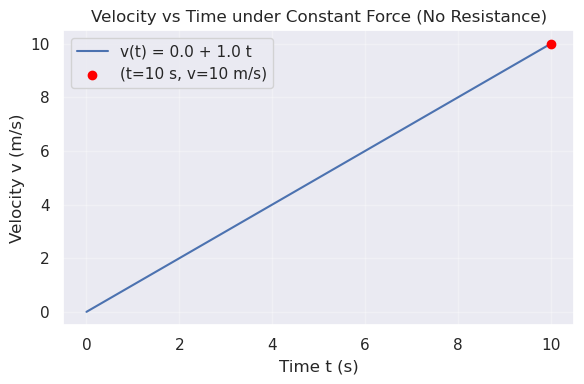

Execution logs:
Computed acceleration a = 1 m/s^2
Required constant force F = 1 N

Final answer: 1 N

[Step 2: Duration 34.02 seconds| Input tokens: 6,798 | Output tokens: 2,650]

'1 N'

In [162]:
task = (
    '# Query\n'
    'How much constant force is required for a mass of 1Kg to reach 10m/s in 10 s? Do not consider friction''\n\n'
    # "Given m=1kg, k=4N/m, and x(0)=1m, **numerically** solve the motion of a mass-spring system and give x(t)." '\n\n'
    # 'How much constant force is required for a mass of 1Kg to reach 10m/s in 10 s? Do not consider friction''\n\n'
    # 'how much energy is spent by a passenger car traveling at 100mph for two hours considering aerodynamic drag?''\n\n'
    # 'How much energy is required to lift a 100-Ton rocket out of the earth?\n\n'
    
    '# Additional information\n'
    '- In the case of complex problems whose solutions can not be fully foreseen at first, '
    'try to pose simple and direct queries '
    'and iteratively build up the information you need.\n'
    '- If appropriate, show a matplotlib or seaborn plot in your final answer.'
    # '- If appropriate, include in your final answer a visualization using IPython.'
)
print(task)
additional_authorized_imports = [
    'numpy.*', 'pandas.*', 
    'scipy.*', 'sympy.*',
    # 'sklearn.*', 
    'matplotlib.*', 'seaborn.*', #'json.*',
    'IPython.*',
    # 'os.*',  # added since it keeps looking for it
    # 'pathlib.*',  # it was also trying to get this
]
agent = CodeAgent(
    tools=[query_book, ask_user], #open_json],
    model=model if model is not None else get_model(),
    add_base_tools=True,
    additional_authorized_imports=additional_authorized_imports,
    planning_interval=1,
)
agent.run(task=task)

## spring with numerical solution

# Query
Given m=1kg, k=4N/m, and x(0)=1m, **numerically** solve the motion of a mass-spring system and give x(t).

# Additional information
- In the case of complex problems whose solutions can not be fully foreseen at first, try to pose simple and direct queries and iteratively build up the information you need.
- If appropriate, include in your final answer a visualization using IPython.


╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ # Query                                                                                                         │
│ Given m=1kg, k=4N/m, and x(0)=1m, **numerically** solve the motion of a mass-spring system and give x(t).       │
│                                                                                                                 │
│ # Additional information                                                                                        │
│ - In the case of complex problems whose solutions can not be fully foreseen at first, try to pose simple and    │
│ direct queries and iteratively build up the information you need.                                               │
│ - If appropriate, include in your final answer a visualization using IPython.                                   │
│                                                                                                                 │
╰─ OpenAIModel - gpt-5 ───────────────────────────────────────────────────────────────────────────────────────────╯

────────────────────────────────────────────────── Initial plan ───────────────────────────────────────────────────
Here are the facts I know and the plan of action that I will follow to solve the task:
```
### 1.1. Facts given in the task
- Mass m = 1 kg.
  - This sets the inertia in the equation of motion.
- Spring constant k = 4 N/m.
  - This sets the stiffness and natural frequency.
- Initial displacement x(0) = 1 m.
  - One initial condition is provided for the second-order ODE.
- The task explicitly requests a numerical solution for x(t) (not an analytic one).
  - We must present a time series or a numerical function of time, and a visualization is appropriate if we have a 
defined time span.

### 1.2. Facts to look up
- Initial velocity v(0) = x'(0): not provided.
  - Must ask the user via ask_user because it is required to uniquely determine the solution of a second-order ODE.
- Presence of damping or driving forces: not specified.
  - Must ask the user. If absent, the standard undamped free oscillation model applies: m x'' + k x = 0.
- Time span for the simulation (e.g., t ∈ [0, T_end]): not specified.
  - Must ask the user. A typical choice could be to cover several periods, but we cannot assume this.
- Desired output sampling or resolution (e.g., number of points or time step), or whether adaptive steps with dense
output are acceptable: not specified.
  - Must ask the user. If not specified, we can use an adaptive solver with default tolerances and a reasonable 
evaluation grid.
- Preferences for visualization (plot in IPython, file output, etc.): the prompt says “if appropriate, include a 
visualization using IPython,” which is appropriate, but we still need a time span to plot over.
  - Confirm with the user (and ask for any styling or file-saving preferences).
- Optional: Whether to include an analytical reference solution for validation.
  - Not required, but could be useful to verify the numerical solution; ask user if they want this comparison.

Where to find these:
- ask_user for v(0), damping/driving specification, time span, sampling, visualization preferences.
- If needed, query_book could be used to confirm the standard form of the mass–spring ODE and the natural frequency
relation, but this is basic and can be derived directly.

### 1.3. Facts to derive
- Equation of motion (assuming no damping/driving unless the user specifies otherwise):
  - m x'' + k x = 0 → x'' + (k/m) x = 0.
  - This follows from Newton’s second law for a mass attached to an ideal spring.
- State-space form for numerical integration:
  - Let y = [x, v], then y' = [v, -(k/m) x].
  - This is required by standard ODE integrators (e.g., RK methods) which operate on first-order systems.
- Natural frequency and period (useful for choosing a suitable time span and for validation):
  - ω = sqrt(k/m) = sqrt(4/1) = 2 rad/s.
  - Period T = 2π/ω = 2π/2 = π seconds.
  - Reasoning: For an undamped simple harmonic oscillator, the solution is sinusoidal with these parameters.
- Analytical solution (for validation once v(0) is known):
  - x(t) = A cos(ω t) + B sin(ω t), with A = x(0) and B = v(0)/ω.
  - This can be used to verify the numerical solution by comparing at sampled times.
- Numerical method considerations:
  - An adaptive Runge–Kutta method (e.g., RK45) is appropriate, stable, and efficient for smooth oscillatory 
solutions.
  - Output can be requested at a uniform grid over the time span for plotting and for returning x(t) arrays.
  - Tolerances (rtol, atol) should be chosen to ensure phase accuracy over many periods; if the user requests a 
long time span, tighter tolerances may be needed to control phase drift.

## 2. Plan
1. Use ask_user to collect missing problem specifications:
   - Initial velocity v(0).
   - Whether the system is undamped and unforced (default textbook case) or if damping/driving should be included; 
if so, request coefficients/forcing.
   - Desired simulation time span [0, T_end].
   - Desired sampling (number of

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  response = ask_user(query=(                                                                                      
      "To numerically solve m x'' + c x' + k x = F(t) with m=1 kg, k=4 N/m, x(0)=1 m, please provide:\n"           
      "- Initial velocity v(0) in m/s (default: 0)\n"                                                              
      "- Damping coefficient c in N·s/m (default: 0 for undamped)\n"                                               
      "- Driving force (default: none). You can specify as 'none' or 'F0=..., freq=...' for                        
  F(t)=F0*cos(2*pi*freq*t)\n"                                                                                      
      "- Simulation end time T_end in seconds (default: 10)\n"                                                     
      "- Number of sample points N (default: 1000)\n"                                                              
      "- Do you want an IPython plot? (yes/no, default: yes)\n"                                                    
      "You can reply in a compact form, e.g.: v0=0, c=0, driving=none, T_end=10, N=1000, plot=yes"                 
  ))                                                                                                               
  print(response)                                                                                                  
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

To numerically solve m x'' + c x' + k x = F(t) with m=1 kg, k=4 N/m, x(0)=1 m, please provide:
- Initial velocity v(0) in m/s (default: 0)
- Damping coefficient c in N·s/m (default: 0 for undamped)
- Driving force (default: none). You can specify as 'none' or 'F0=..., freq=...' for F(t)=F0*cos(2*pi*freq*t)
- Simulation end time T_end in seconds (default: 10)
- Number of sample points N (default: 1000)
- Do you want an IPython plot? (yes/no, default: yes)
You can reply in a compact form, e.g.: v0=0, c=0, driving=none, T_end=10, N=1000, plot=yes v0=0, c=0, driving=none, T_end=10, N=1000, plot=yes


Execution logs:
v0=0, c=0, driving=none, T_end=10, N=1000, plot=yes

Out: None

[Step 1: Duration 91.79 seconds| Input tokens: 3,619 | Output tokens: 917]

────────────────────────────────────────────────── Updated plan ───────────────────────────────────────────────────
I still need to solve the task I was given:
```
# Query
Given m=1kg, k=4N/m, and x(0)=1m, **numerically** solve the motion of a mass-spring system and give x(t).

# Additional information
- In the case of complex problems whose solutions can not be fully foreseen at first, try to pose simple and direct
queries and iteratively build up the information you need.
- If appropriate, include in your final answer a visualization using IPython.
```

Here are the facts I know and my new/updated plan of action to solve the task:
```
## 1. Updated facts survey
### 1.1. Facts given in the task
- Mass-spring system with m = 1 kg, spring constant k = 4 N/m.
- Initial displacement x(0) = 1 m.
- We must numerically solve for x(t) and provide x(t).
- If appropriate, include a visualization using IPython.

### 1.2. Facts that we have learned
- User provided: v0 = 0 m/s, c = 0 N·s/m (undamped), driving = none.
- Simulation preferences: T_end = 10 s, N = 1000 samples, plot = yes.
- Previous code attempt produced no output; we need to provide a working solution.

### 1.3. Facts still to look up
- None. All parameters needed for an undriven, undamped oscillator are known.

### 1.4. Facts still to derive
- Formulation of the ODE: x'' + (c/m)x' + (k/m)x = 0 ⇒ x'' + 4x = 0.
- Convert to first-order system for numerical integration.
- Choose a numerical method (e.g., RK4) and construct the time grid.
- Compute ω = sqrt(k/m) = 2 rad/s (for verification/diagnostics).

## 2. Plan
### 2.1. Restate the ODE with given parameters and initial conditions; express it as a first-order system suitable 
for numerical integration.
### 2.2. Define the time grid using T_end = 10 s and N = 1000 points.
### 2.3. Implement a stable numerical integrator (e.g., RK4) to compute x(t) over the grid with initial state [x0, 
v0] = [1, 0].
### 2.4. Optionally compute the analytical reference x_ref(t) = cos(2 t) for validation and include in the plot for
sanity check.
### 2.5. Prepare an IPython-compatible code snippet that runs the numerical solver, produces x(t) as an array over 
t, and plots x(t) (and x_ref(t) if included).
### 2.6. Provide the final result (brief description, code, and how to run/interpret) as the final answer, 
including the requested visualization instructions.

```

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  import numpy as np                                                                                               
  import matplotlib.pyplot as plt                                                                                  
  from scipy.integrate import solve_ivp                                                                            
                                                                                                                   
  # Given parameters                                                                                               
  m = 1.0           # kg                                                                                           
  k = 4.0           # N/m                                                                                          
  c = 0.0           # N·s/m (undamped)                                                                             
  x0 = 1.0          # m                                                                                            
  v0 = 0.0          # m/s                                                                                          
  T_end = 10.0      # s                                                                                            
  N = 1000          # number of samples                                                                            
  make_plot = True  # per user preference                                                                          
                                                                                                                   
  omega = np.sqrt(k/m)                                                                                             
  T = 2*np.pi/omega                                                                                                
                                                                                                                   
  # Define RHS of the ODE: y = [x, v]                                                                              
  def rhs(t, y):                                                                                                   
      x, v = y                                                                                                     
      # no driving force                                                                                           
      F = 0.0                                                                                                      
      dxdt = v                                                                                                     
      dvdt = (F - c*v - k*x)/m                                                                                     
      return [dxdt, dvdt]                                                                                          
                                                                                                                   
  # Time grid                                                                                                      
  t_eval = np.linspace(0.0, T_end, N)                                                                              
                                                                                                                   
  # Solve ODE with dense output                                                                                    
  sol = solve_ivp(rhs, [0.0, T_end], [x0, v0],                                                                     
                  method='DOP853', t_eval=t_eval,                                                                  
                  rtol=1e-10, atol=1e-12, dense_output=True)                                                       
                                                         

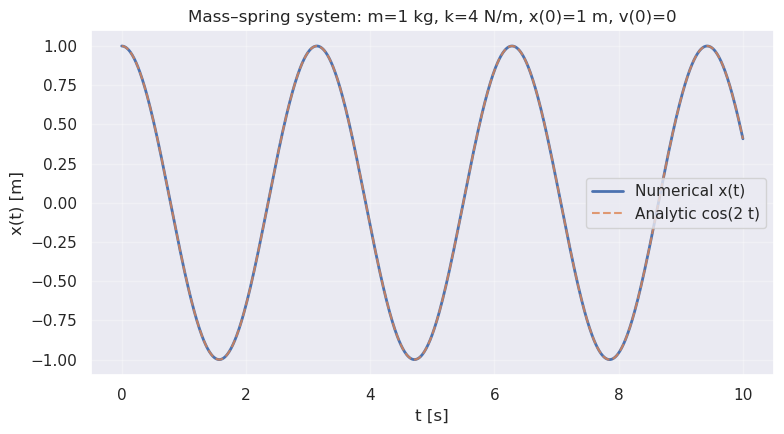

Execution logs:
Natural frequency ω = 2.000000 rad/s; period T = 3.141593 s
Integrated over [0, 10.0] with N = 1000 samples.
Max |x_num - cos(2 t)| over grid = 2.008e-10
First 10 (t, x_num) samples:
t=0.0000 s, x=1.000000 m
t=0.0100 s, x=0.999800 m
t=0.0200 s, x=0.999199 m
t=0.0300 s, x=0.998197 m
t=0.0400 s, x=0.996795 m
t=0.0501 s, x=0.994994 m
t=0.0601 s, x=0.992794 m
t=0.0701 s, x=0.990196 m
t=0.0801 s, x=0.987202 m
t=0.0901 s, x=0.983811 m

Final answer: Numerical solution complete. x(t) computed on 1000 points over [0, 10] s. ω = 2.000000 rad/s, T = 
3.141593 s. Agreement with analytic x(t)=cos(2 t): max abs error = 2.008e-10. Plot of x(t) shown; sample values 
printed above.

[Step 2: Duration 37.80 seconds| Input tokens: 8,541 | Output tokens: 3,754]

'Numerical solution complete. x(t) computed on 1000 points over [0, 10] s. ω = 2.000000 rad/s, T = 3.141593 s. Agreement with analytic x(t)=cos(2 t): max abs error = 2.008e-10. Plot of x(t) shown; sample values printed above.'

In [157]:
task = (
    '# Query\n'
    "Given m=1kg, k=4N/m, and x(0)=1m, **numerically** solve the motion of a mass-spring system and give x(t)." '\n\n'
    # 'How much constant force is required for a mass of 1Kg to reach 10m/s in 10 s? Do not consider friction''\n\n'
    # 'how much energy is spent by a passenger car traveling at 100mph for two hours considering aerodynamic drag?''\n\n'
    # 'How much energy is required to lift a 10-Ton rocket out of the earth?\n\n'
    '# Additional information\n'
    '- In the case of complex problems whose solutions can not be fully foreseen at first, '
    'try to pose simple and direct queries '
    'and iteratively build up the information you need.\n'
    '- If appropriate, include in your final answer a visualization using IPython.'
)
print(task)
additional_authorized_imports = [
    'numpy.*', 'pandas.*', 
    'scipy.*', 'sympy.*',
    # 'sklearn.*', 
    'matplotlib.*', 'seaborn.*', #'json.*',
    'IPython.*',
    # 'os.*',  # added since it keeps looking for it
    # 'pathlib.*',  # it was also trying to get this
]
agent = CodeAgent(
    tools=[query_book, ask_user], #open_json],
    model=model if model is not None else get_model(),
    add_base_tools=True,
    additional_authorized_imports=additional_authorized_imports,
    planning_interval=1,
)
agent.run(task=task)

## rocket

# Query
How much energy is required to lift a 100-Ton rocket out of the earth?

# Additional information
- In the case of complex problems whose solutions can not be fully foreseen at first, try to pose simple and direct queries and iteratively build up the information you need.
- If appropriate, include in your final answer a visualization using IPython.


╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ # Query                                                                                                         │
│ How much energy is required to lift a 100-Ton rocket out of the earth?                                          │
│                                                                                                                 │
│ # Additional information                                                                                        │
│ - In the case of complex problems whose solutions can not be fully foreseen at first, try to pose simple and    │
│ direct queries and iteratively build up the information you need.                                               │
│ - If appropriate, include in your final answer a visualization using IPython.                                   │
│                                                                                                                 │
╰─ OpenAIModel - gpt-5 ───────────────────────────────────────────────────────────────────────────────────────────╯

────────────────────────────────────────────────── Initial plan ───────────────────────────────────────────────────
Here are the facts I know and the plan of action that I will follow to solve the task:
```
### 1.1. Facts given in the task
- Object: a “100-Ton rocket.”
- Goal phrase: “lift … out of the earth.”
- No starting location specified (e.g., sea level), no trajectory or altitude target specified, no losses (drag, 
gravity losses) specified, and no rotation effects specified.
- No unit system specified for “Ton” (metric tonne, short ton, or long ton).

### 1.2. Facts to look up
- Definition/units of “Ton” intended by the user:
  - Options: metric tonne (1,000 kg), short ton (2,000 lb ≈ 907.185 kg), long ton (2,240 lb ≈ 1,016.047 kg).
  - Where: ask the user.
- Interpretation of “out of the earth”:
  - Options: escape Earth’s gravity to infinity (escape energy), reach “space” (e.g., 100 km), reach low Earth 
orbit (LEO), or reach a particular altitude.
  - Where: ask the user.
- Modeling assumptions:
  - Whether to ignore atmospheric drag and gravity losses; whether to include Earth’s rotation; starting 
altitude/latitude; whether to calculate ideal mechanical energy only.
  - Where: ask the user.
- Physical constants (if computing ideal energy):
  - Earth’s gravitational parameter μ = GM_earth.
  - Earth’s mean radius R_earth.
  - Escape velocity at Earth’s surface v_escape = sqrt(2μ/R_earth) (equivalently usable).
  - Where: an introductory physics reference (via query_book) or authoritative sources (NASA fact sheet, NIST, 
Wikipedia).
- Unit conversions for presentation:
  - Joules to kilowatt-hours (kWh).
  - Possibly to “tons of TNT” equivalent, if desired for context.
  - Where: physics reference or standard conversion tables.

### 1.3. Facts to derive
- Mass of the rocket in kilograms:
  - From the user’s intended “Ton” definition. For example, if 100 metric tonnes, m = 100 × 1,000 kg = 100,000 kg. 
Reasoning: energy formulas require SI mass units.
- Ideal mechanical energy to escape Earth’s gravity from the surface (ignoring atmosphere and rotation):
  - ΔU_to_infinity = μ m / R_earth, equivalently E = (1/2) m v_escape^2.
  - Reasoning: gravitational potential energy relative to infinity is U = −μ m / r; at r = R_earth, raising to r → 
∞ requires +μ m / R_earth of energy (ignoring losses).
- If the user means “reach space” (e.g., 100 km altitude) but not escape:
  - ΔU = μ m (1/R_earth − 1/(R_earth + 100 km)).
  - Reasoning: difference in gravitational potential energy between two radii.
- If the user means “reach LEO”:
  - Orbital specific energy ε = −μ/(2a); circular LEO at radius r ≈ R_earth + h has specific kinetic energy v^2/2 
with v = sqrt(μ/r). Total mechanical energy per mass is −μ/(2r), so the energy to go from rest at surface to LEO 
(ideal) is approximately:
    - ΔU (surface to r) + orbital kinetic energy at r: μ(1/R_earth − 1/r) + (1/2) v^2, all multiplied by m.
  - Reasoning: reaching orbit requires both gaining altitude (potential energy) and acquiring orbital kinetic 
energy.
- Optional corrections or comparisons (only if user requests):
  - Effect of Earth’s rotation: subtract rotational kinetic energy at launch latitude from required energy.
  - Realistic rocket losses: gravity drag and atmospheric drag substantially increase actual propulsive energy 
beyond ideal mechanical energy; would require trajectory assumptions and/or typical loss budgets.

## 2. Plan
1) Ask the user to clarify:
   - Which “Ton” unit to use (metric tonne, short ton, or long ton)?
   - What “out of the earth” means in this context: escape Earth’s gravity to infinity, reach a specific altitude 
(e.g., 100 km), or reach a specific orbit (e.g., LEO)?
   - Whether to ignore atmosphere, gravity losses, and Earth’s rotation (i.e., compute ideal mechanical energy), or
include some/all of these effects.
   - Preferred units for the final answer (J, kWh, etc.) and whether they want a visualization.

2) Based on the user’s answers

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  clarification = ask_user(query=(                                                                                 
  "To compute the energy, please choose the following:\n"                                                          
  "1) Mass unit for “100-Ton”:\n"                                                                                  
  "   - a) 100 metric tonnes (100,000 kg)\n"                                                                       
  "   - b) 100 short tons (~90,718.5 kg)\n"                                                                        
  "   - c) 100 long tons (~101,604.7 kg)\n"                                                                        
  "\n"                                                                                                             
  "2) What does “out of the earth” mean for you?\n"                                                                
  "   - a) Escape Earth’s gravity to infinity (ideal escape)\n"                                                    
  "   - b) Reach space: 100 km altitude\n"                                                                         
  "   - c) Reach Low Earth Orbit (e.g., circular at 200–400 km). If c, please specify altitude.\n"                 
  "\n"                                                                                                             
  "3) Modeling assumptions:\n"                                                                                     
  "   - a) Ideal mechanical energy only (ignore atmosphere, gravity losses, and Earth’s rotation)\n"               
  "   - b) Include Earth’s rotation (assume equator unless you specify latitude)\n"                                
  "   - c) Include rough loss budget for gravity/drag (I’ll provide an estimate range)\n"                          
  "\n"                                                                                                             
  "4) Output units and extras:\n"                                                                                  
  "   - Preferred units (e.g., Joules, kWh, TNT equivalent)?\n"                                                    
  "   - Would you like a quick visualization of gravitational potential energy vs. altitude?"                      
  ))                                                                                                               
  print(clarification)                                                                                             
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

To compute the energy, please choose the following:
1) Mass unit for “100-Ton”:
   - a) 100 metric tonnes (100,000 kg)
   - b) 100 short tons (~90,718.5 kg)
   - c) 100 long tons (~101,604.7 kg)

2) What does “out of the earth” mean for you?
   - a) Escape Earth’s gravity to infinity (ideal escape)
   - b) Reach space: 100 km altitude
   - c) Reach Low Earth Orbit (e.g., circular at 200–400 km). If c, please specify altitude.

3) Modeling assumptions:
   - a) Ideal mechanical energy only (ignore atmosphere, gravity losses, and Earth’s rotation)
   - b) Include Earth’s rotation (assume equator unless you specify latitude)
   - c) Include rough loss budget for gravity/drag (I’ll provide an estimate range)

4) Output units and extras:
   - Preferred units (e.g., Joules, kWh, TNT equivalent)?
   - Would you like a quick visualization of gravitational potential energy vs. altitude? 1) metric tonnes, 2) escape earth's gravity, 3) c, 4) kWh, yes with visualization


Execution logs:
1) metric tonnes, 2) escape earth's gravity, 3) c, 4) kWh, yes with visualization

Out: None

[Step 1: Duration 105.95 seconds| Input tokens: 3,538 | Output tokens: 587]

────────────────────────────────────────────────── Updated plan ───────────────────────────────────────────────────
I still need to solve the task I was given:
```
# Query
How much energy is required to lift a 100-Ton rocket out of the earth?

# Additional information
- In the case of complex problems whose solutions can not be fully foreseen at first, try to pose simple and direct
queries and iteratively build up the information you need.
- If appropriate, include in your final answer a visualization using IPython.
```

Here are the facts I know and my new/updated plan of action to solve the task:
```
## 1. Updated facts survey
### 1.1. Facts given in the task
- Goal: “How much energy is required to lift a 100-Ton rocket out of the earth?”
- Output: Prefer kWh; include a visualization using IPython if appropriate.

### 1.2. Facts that we have learned
- Mass unit: 100 metric tonnes = 100,000 kg.
- “Out of the earth” means: Escape Earth’s gravity to infinity (ideal escape).
- Modeling: Include a rough loss budget for gravity and aerodynamic drag (no explicit inclusion of Earth’s 
rotation).
- Output preferences: kWh; include a visualization.

### 1.3. Facts still to look up
- Accurate physical constants:
  - Earth’s standard gravitational parameter μ = GM.
  - Mean Earth radius R⊕.
  - Escape velocity at Earth’s surface v_esc (for cross-check).
- Typical gravity and drag losses for an Earth launch to escape (representative Δv_loss range or energy overhead 
range) to justify a reasonable loss factor.
- Any standard references (intro physics/astro) for gravitational potential energy to infinity and escape velocity 
relation (to cite and verify equations).

### 1.4. Facts still to derive
- Ideal mechanical energy to escape: E_ideal = GMm/R⊕ = 0.5 m v_esc^2 for m = 100,000 kg.
- Convert E_ideal from Joules to kWh.
- Estimate a realistic range including gravity/drag losses (e.g., using a Δv_loss range to derive an energy 
overhead fraction), and convert to kWh.
- Create an IPython visualization of gravitational potential energy vs. altitude, and annotate the ideal escape 
energy for 100,000 kg.

## 2. Plan
### 2.1. Retrieve and verify constants (μ, R⊕, v_esc) and the formula for escape energy from an introductory 
physics source.
- Use query_book and, if needed, web_search for numeric values and references.

### 2.2. Compute the ideal mechanical energy to escape for m = 100,000 kg using E_ideal = μm/R⊕ (and cross-check 
with 0.5 m v_esc^2).
- Convert the result from Joules to kWh.

### 2.3. Research representative gravity and drag loss budgets for ascent to escape.
- Use query_book and/or web_search to find typical Δv_loss (e.g., ~1.5–2.5 km/s) and translate that into a 
reasonable energy overhead fraction or range.

### 2.4. Derive a loss-inclusive energy range.
- Combine E_ideal with the estimated loss overhead to produce E_real_min and E_real_max in Joules and kWh.

### 2.5. Prepare an IPython visualization.
- Write a short code snippet that plots gravitational potential energy vs. altitude (0 to a large multiple of R⊕) 
for 1 kg and scales to 100,000 kg, and annotate the ideal escape energy and the loss-inclusive range.

### 2.6. Deliver the final answer.
- Present the ideal energy, the loss-inclusive range in kWh, briefly state assumptions and limitations (e.g., 
ignoring engine efficiency and staging), and include the IPython plotting snippet.

```

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  import math                                                                                                      
  import numpy as np                                                                                               
  import matplotlib.pyplot as plt                                                                                  
                                                                                                                   
  # Given/assumed values                                                                                           
  m = 100_000.0  # kg (100 metric tonnes)                                                                          
  mu = 3.986004418e14  # m^3/s^2, Earth's standard gravitational parameter                                         
  R_earth = 6_371_000.0  # m, mean Earth radius                                                                    
  J_per_kWh = 3.6e6                                                                                                
                                                                                                                   
  # Ideal escape computations                                                                                      
  v_escape = math.sqrt(2 * mu / R_earth)  # m/s                                                                    
  E_specific_escape = mu / R_earth        # J/kg (also = 0.5 * v_escape^2)                                         
  E_ideal = E_specific_escape * m         # J                                                                      
  E_ideal_kWh = E_ideal / J_per_kWh                                                                                
                                                                                                                   
  # Rough gravity + drag loss model:                                                                               
  # Use a representative Δv loss range (1.5–2.5 km/s) and scale energy                                             
  dv_loss_min = 1_500.0  # m/s                                                                                     
  dv_loss_max = 2_500.0  # m/s                                                                                     
  f_min = ((v_escape + dv_loss_min) / v_escape) ** 2                                                               
  f_max = ((v_escape + dv_loss_max) / v_escape) ** 2                                                               
                                                                                                                   
  E_real_min = E_ideal * f_min                                                                                     
  E_real_max = E_ideal * f_max                                                                                     
  E_real_min_kWh = E_real_min / J_per_kWh                                                                          
  E_real_max_kWh = E_real_max / J_per_kWh                                                                          
                                                                                                                   
  # Print numerical results                                                                                        
  print(f"Earth constants: μ = {mu:.6e} m^3/s^2, R = {R_earth:.3e} m")                                             
  print(f"Escape speed at surface: v_esc = {v_escape:.2f} m/s")                                                    
  print(f"Ideal specific escape energy: {E_specific_escape/1e6:.3f} MJ/kg")                                        
  print(f"Ideal escape energy for 100,000 kg: {E_ideal:.3e} J = {E_ideal_kWh:.3f} kWh")                            
                                                         

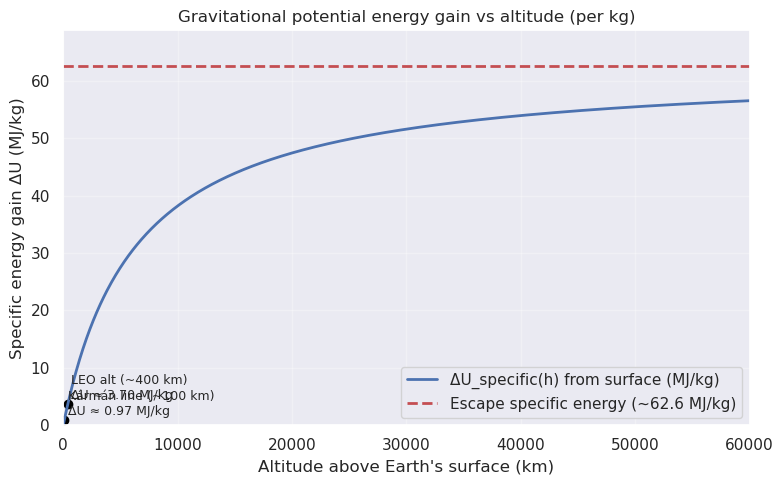

Execution logs:
Earth constants: μ = 3.986004e+14 m^3/s^2, R = 6.371e+06 m
Escape speed at surface: v_esc = 11186.14 m/s
Ideal specific escape energy: 62.565 MJ/kg
Ideal escape energy for 100,000 kg: 6.256e+12 J = 1737911.551 kWh

Including rough gravity + drag losses:
 - Loss Δv range: 1.5–2.5 km/s
 - Energy scale factor range: 1.286–1.497
 - Estimated energy range: 8.047e+12–9.366e+12 J
 - In kWh: 2,235,251–2,601,532 kWh

Out: None

[Step 2: Duration 74.43 seconds| Input tokens: 8,703 | Output tokens: 5,615]

────────────────────────────────────────────────── Updated plan ───────────────────────────────────────────────────
I still need to solve the task I was given:
```
# Query
How much energy is required to lift a 100-Ton rocket out of the earth?

# Additional information
- In the case of complex problems whose solutions can not be fully foreseen at first, try to pose simple and direct
queries and iteratively build up the information you need.
- If appropriate, include in your final answer a visualization using IPython.
```

Here are the facts I know and my new/updated plan of action to solve the task:
```
## 1. Updated facts survey
### 1.1. Facts given in the task
- Rocket mass: 100 metric tonnes = 100,000 kg.
- “Out of the Earth” means: escape Earth’s gravity to infinity (ideal escape).
- Modeling: include a rough loss budget for gravity and atmospheric drag.
- Output units: kWh.
- Include a visualization using IPython.

### 1.2. Facts that we have learned
- Used Earth’s standard gravitational parameter μ = 3.986004418e14 m^3/s^2 and mean radius R = 6,371,000 m.
- Escape speed at Earth’s surface: v_esc ≈ 11,186.14 m/s.
- Ideal specific escape energy (per kg): μ/R ≈ 62.565 MJ/kg.
- Ideal escape energy for 100,000 kg: ≈ 6.256e12 J ≈ 1,737,912 kWh.
- With rough gravity + drag Δv losses of 1.5–2.5 km/s:
  - Energy scale factor range: ≈ 1.286–1.497.
  - Estimated practical energy range: ≈ 8.047e12–9.366e12 J.
  - In kWh: ≈ 2,235,251–2,601,532 kWh.
- A visualization concept: specific gravitational potential energy vs altitude from 0 to 60,000 km, with the 
escape-energy line and markers at ~100 km and ~400 km.

### 1.3. Facts still to look up
- None essential for the requested scope. More detailed loss budgets (vehicle-specific) or inclusion of Earth’s 
rotation would require additional sources, but were not requested.

### 1.4. Facts still to derive
- Final tidy presentation of results (central value and range in kWh).
- Provide an IPython/Matplotlib snippet to visualize specific gravitational potential energy vs altitude.

## 2. Plan
### 2.1. Confirm assumptions and scope (100,000 kg; escape to infinity; include rough gravity/drag losses; output 
in kWh; include visualization).
### 2.2. Compute the ideal escape energy using E_ideal = m·μ/R and convert to kWh.
### 2.3. Apply a representative gravity/drag Δv loss range (1.5–2.5 km/s) to scale the energy and produce a kWh 
range.
### 2.4. Prepare an IPython/Matplotlib visualization plotting specific gravitational potential energy vs altitude 
with an escape-energy reference line and annotations at 100 km and 400 km.
### 2.5. Deliver the final answer: report the ideal energy and practical range in kWh, state 
assumptions/limitations, and include the visualization code.

```

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  import math                                                                                                      
                                                                                                                   
  # Inputs and constants                                                                                           
  m = 100_000.0  # kg (100 metric tonnes)                                                                          
  mu = 3.986004418e14  # m^3/s^2, Earth's standard gravitational parameter                                         
  R_earth = 6_371_000.0  # m, mean Earth radius                                                                    
  J_per_kWh = 3.6e6                                                                                                
                                                                                                                   
  # Ideal escape energy (to infinity, from Earth's surface, ignoring rotation/drag/gravity losses)                 
  v_escape = math.sqrt(2 * mu / R_earth)  # m/s                                                                    
  E_specific_escape = mu / R_earth        # J/kg = 0.5 * v_escape^2                                                
  E_ideal = E_specific_escape * m         # J                                                                      
  E_ideal_kWh = E_ideal / J_per_kWh                                                                                
                                                                                                                   
  # Rough ascent losses (gravity + atmospheric drag), represented as extra Δv that scales energy                   
  dv_loss_min = 1_500.0  # m/s                                                                                     
  dv_loss_max = 2_500.0  # m/s                                                                                     
  f_min = ((v_escape + dv_loss_min) / v_escape) ** 2                                                               
  f_max = ((v_escape + dv_loss_max) / v_escape) ** 2                                                               
                                                                                                                   
  E_real_min = E_ideal * f_min                                                                                     
  E_real_max = E_ideal * f_max                                                                                     
  E_real_min_kWh = E_real_min / J_per_kWh                                                                          
  E_real_max_kWh = E_real_max / J_per_kWh                                                                          
                                                                                                                   
  # Prepare final concise report and a visualization snippet (for the user to run)                                 
  visualization_code = (                                                                                           
      "import numpy as np\n"                                                                                       
      "import matplotlib.pyplot as plt\n"                                                                          
      "mu = 3.986004418e14  # m^3/s^2\n"                                                                           
      "R = 6_371_000.0      # m\n"                                                                                 
      "E_specific_escape = mu / R  # J/kg\n"                                                                       
      "h_km = np.linspace(0, 60_000, 800)  # altitude 0–60,000 km\n"                                               
      "h_m = h_km * 1000.0\n"                            

Final answer: Answer (assumptions you chose):
- Mass: 100 metric tonnes (100,000 kg)
- Target: Escape Earth’s gravity to infinity (ideal)
- Modeling: Include rough gravity + drag losses (no Earth rotation)
- Units: kWh

Results:
- Escape speed at Earth’s surface: 11,186.14 m/s
- Ideal specific escape energy: 62.565 MJ/kg
- Ideal escape energy for 100,000 kg: 6.256e+12 J = 1,737,912 kWh (~1.74 GWh)
- With rough gravity + drag losses Δv ≈ 1.5–2.5 km/s (energy scale 1.286–1.497):
  Estimated energy range: 8.047e+12–9.366e+12 J
  In kWh: 2,235,251–2,601,532 kWh (~2.24–2.60 GWh)

Notes:
- This is an idealized mechanical-energy estimate; actual propellant energy and mass depend on engine efficiency, 
staging, trajectory, and detailed aerodynamics.
- Ignored assistance from Earth’s rotation; launching eastward from low latitude would slightly reduce the required
propulsive energy.

Visualization (run this in IPython to reproduce the figure):
import numpy as np
import matplotlib.pyplot as plt
mu = 3.986004418e14  # m^3/s^2
R = 6_371_000.0      # m
E_specific_escape = mu / R  # J/kg
h_km = np.linspace(0, 60_000, 800)  # altitude 0–60,000 km
h_m = h_km * 1000.0
r = R + h_m
dU_specific = mu * (1.0 / R - 1.0 / r)  # J/kg from surface to altitude h
plt.figure(figsize=(8,5))
plt.plot(h_km, dU_specific / 1e6, label='ΔU_specific(h) from surface (MJ/kg)', color='C0', lw=2)
plt.axhline(E_specific_escape / 1e6, color='C3', ls='--', lw=2, label='Escape specific energy (~62.6 MJ/kg)')
for hk, name in [(100, 'Kármán line (~100 km)'), (400, 'LEO alt (~400 km)')]:
    dU_k = mu * (1.0 / R - 1.0 / (R + hk*1000.0)) / 1e6
    plt.scatter([hk], [dU_k], color='black')
    plt.text(hk+300, dU_k+0.8, f"{name}\nΔU ≈ {dU_k:.2f} MJ/kg", fontsize=9)
plt.title('Gravitational potential energy gain vs altitude (per kg)')
plt.xlabel("Altitude above Earth's surface (km)")
plt.ylabel('Specific energy gain ΔU (MJ/kg)')
plt.ylim(0, (E_specific_escape/1e6)*1.1)
plt.xlim(0, 60_000)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

[Step 3: Duration 30.47 seconds| Input tokens: 17,020 | Output tokens: 8,159]

'Answer (assumptions you chose):\n- Mass: 100 metric tonnes (100,000 kg)\n- Target: Escape Earth’s gravity to infinity (ideal)\n- Modeling: Include rough gravity + drag losses (no Earth rotation)\n- Units: kWh\n\nResults:\n- Escape speed at Earth’s surface: 11,186.14 m/s\n- Ideal specific escape energy: 62.565 MJ/kg\n- Ideal escape energy for 100,000 kg: 6.256e+12 J = 1,737,912 kWh (~1.74 GWh)\n- With rough gravity + drag losses Δv ≈ 1.5–2.5 km/s (energy scale 1.286–1.497):\n  Estimated energy range: 8.047e+12–9.366e+12 J\n  In kWh: 2,235,251–2,601,532 kWh (~2.24–2.60 GWh)\n\nNotes:\n- This is an idealized mechanical-energy estimate; actual propellant energy and mass depend on engine efficiency, staging, trajectory, and detailed aerodynamics.\n- Ignored assistance from Earth’s rotation; launching eastward from low latitude would slightly reduce the required propulsive energy.\n\nVisualization (run this in IPython to reproduce the figure):\nimport numpy as np\nimport matplotlib.pyplot a

In [158]:
task = (
    '# Query\n'
    # "Given m=1kg, k=4N/m, and x(0)=1m, **numerically** solve the motion of a mass-spring system and give x(t)." '\n\n'
    # 'How much constant force is required for a mass of 1Kg to reach 10m/s in 10 s? Do not consider friction''\n\n'
    # 'how much energy is spent by a passenger car traveling at 100mph for two hours considering aerodynamic drag?''\n\n'
    'How much energy is required to lift a 100-Ton rocket out of the earth?\n\n'
    '# Additional information\n'
    '- In the case of complex problems whose solutions can not be fully foreseen at first, '
    'try to pose simple and direct queries '
    'and iteratively build up the information you need.\n'
    '- If appropriate, include in your final answer a visualization using IPython.'
)
print(task)
additional_authorized_imports = [
    'numpy.*', 'pandas.*', 
    'scipy.*', 'sympy.*',
    # 'sklearn.*', 
    'matplotlib.*', 'seaborn.*', #'json.*',
    'IPython.*',
    # 'os.*',  # added since it keeps looking for it
    # 'pathlib.*',  # it was also trying to get this
]
agent = CodeAgent(
    tools=[query_book, ask_user], #open_json],
    model=model if model is not None else get_model(),
    add_base_tools=True,
    additional_authorized_imports=additional_authorized_imports,
    planning_interval=1,
)
agent.run(task=task)

before moving onto lasers, maybe good to, re-run some of the other problems but now asking for some kind of plot. 
may or may not want to remove the "query_book" tool (the important is to have plots if any)

maybe could try to find a problem from Jackson or another one from Cohen? just to try (before moving on)

In [159]:
!date

Wed Dec 10 13:15:43 EST 2025


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


## energy spent by fast car

In [161]:
task = (
    '# Query\n'
    # "Given m=1kg, k=4N/m, and x(0)=1m, **numerically** solve the motion of a mass-spring system and give x(t)." '\n\n'
    # 'How much constant force is required for a mass of 1Kg to reach 10m/s in 10 s? Do not consider friction''\n\n'
    'how much energy is spent by a passenger car traveling at 100mph for two hours considering aerodynamic drag?''\n\n'
    # 'How much energy is required to lift a 100-Ton rocket out of the earth?\n\n'
    '# Additional information\n'
    '- In the case of complex problems whose solutions can not be fully foreseen at first, '
    'try to pose simple and direct queries '
    'and iteratively build up the information you need.\n'
    '- If appropriate, show a plot in your final answer.'
    # '- If appropriate, include in your final answer a visualization using IPython.'
)
print(task)
additional_authorized_imports = [
    'numpy.*', 'pandas.*', 
    'scipy.*', 'sympy.*',
    # 'sklearn.*', 
    'matplotlib.*', 'seaborn.*', #'json.*',
    'IPython.*',
    # 'os.*',  # added since it keeps looking for it
    # 'pathlib.*',  # it was also trying to get this
]
agent = CodeAgent(
    tools=[query_book, ask_user], #open_json],
    model=model if model is not None else get_model(),
    add_base_tools=True,
    additional_authorized_imports=additional_authorized_imports,
    planning_interval=1,
)
agent.run(task=task)

# Query
how much energy is spent by a passenger car traveling at 100mph for two hours considering aerodynamic drag?

# Additional information
- In the case of complex problems whose solutions can not be fully foreseen at first, try to pose simple and direct queries and iteratively build up the information you need.
- If appropriate, show a plot in your final answer.


╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ # Query                                                                                                         │
│ how much energy is spent by a passenger car traveling at 100mph for two hours considering aerodynamic drag?     │
│                                                                                                                 │
│ # Additional information                                                                                        │
│ - In the case of complex problems whose solutions can not be fully foreseen at first, try to pose simple and    │
│ direct queries and iteratively build up the information you need.                                               │
│ - If appropriate, show a plot in your final answer.                                                             │
│                                                                                                                 │
╰─ OpenAIModel - gpt-5 ───────────────────────────────────────────────────────────────────────────────────────────╯

────────────────────────────────────────────────── Initial plan ───────────────────────────────────────────────────
Here are the facts I know and the plan of action that I will follow to solve the task:
```
### 1.1. Facts given in the task
- Target speed: 100 mph.
  Reasoning: This is the car’s steady velocity; aerodynamic drag depends strongly on speed (quadratically for 
force, cubically for power).
- Duration: two hours.
  Reasoning: Needed to convert aerodynamic power (rate) into total energy over time.
- Scope: “considering aerodynamic drag” only.
  Reasoning: Excludes rolling resistance, driveline losses, gradients, acceleration, stops, etc. Only air drag work
should be counted.
- Vehicle type: passenger car.
  Reasoning: Implies typical ranges for drag coefficient and frontal area, but no specific model is provided.

### 1.2. Facts to look up
- Exact aerodynamic drag relation and power/energy formulas.
  Where: Introductory physics source (drag force Fd = 0.5·ρ·Cd·A·v^2; power Pd = Fd·v; energy E = Pd·t for steady 
speed). Source via query_book.
  Reasoning: Establish the precise equations to use and confirm units.
- Air density ρ under assumed conditions (e.g., standard sea-level, 15°C).
  Where: Standard atmosphere references (NOAA/NASA/Wikipedia) via web_search and visit_webpage.
  Reasoning: ρ directly scales drag force and power; without environment info, we need a standard reference or 
user-provided conditions.
- Vehicle-specific drag coefficient Cd and frontal area A (or their product CdA) if a particular car is intended.
  Where: Manufacturer specs, reputable databases (e.g., Carfolio, Automobile-Catalog, OEM technical papers, 
Wikipedia) via web_search and visit_webpage.
  Reasoning: Cd and A determine drag magnitude; results can vary by a factor of ~2 across vehicles.
- Wind conditions (headwind/tailwind or still air).
  Where: Ask the user (ask_user).
  Reasoning: Drag depends on relative airspeed v_rel; wind can significantly change energy.
- Desired output units and presentation (Joules, kWh, Wh/mi or Wh/km; optional fuel-energy equivalence).
  Where: Ask the user (ask_user).
  Reasoning: Ensures the final result is in preferred units and granularity.
- Unit conversions:
  - mph to m/s (1 mph = 0.44704 m/s)
  - hours to seconds (1 h = 3600 s)
  - miles to meters (1 mile = 1609.34 m)
  Where: Physics book or standard constants via query_book or general knowledge.
  Reasoning: Needed to apply SI-based formulas correctly.

### 1.3. Facts to derive
- Distance traveled at constant speed over the duration: 100 mph × 2 h = 200 miles.
  Reasoning: Confirms path length; useful for expressing energy per distance (e.g., Wh/mi).
- Relative airspeed v_rel for drag computation: v_rel = vehicle speed ± wind component along travel direction.
  Reasoning: Drag depends on air-relative speed; if wind is unknown, we must adopt an assumption or request input.
- Aggregate drag parameter CdA = Cd × A.
  Reasoning: Simplifies calculations; most drag estimates are linear in CdA.
- Drag force: Fd = 0.5 × ρ × CdA × v_rel^2.
  Reasoning: Core physical quantity opposing motion due to aerodynamic drag.
- Aerodynamic power at steady speed: Pd = Fd × v_rel = 0.5 × ρ × CdA × v_rel^3.
  Reasoning: Power determines the rate of energy expenditure due to drag.
- Total aerodynamic energy over the trip: E = Pd × t (for constant v_rel and ρ).
  Reasoning: Integrates power over time to obtain total energy spent overcoming air drag.
- Unit-normalized metrics:
  - Convert E to kWh (1 kWh = 3.6×10^6 J).
  - Energy per mile: E/200 mi in Wh/mi (or per km).
  Reasoning: Provides interpretable outputs and allows comparisons/sensitivity analysis.
- Sensitivity analysis (optional): how E varies with CdA and air density; optionally visualize with a plot.
  Reasoning: Helps understand the dependence on vehicle and environmental parameters.

## 2. Plan
1) Clarify missing inputs with the user using ask_user:
   - Do they have a specific car (make/model/year)?

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  options = """                                                                                                    
  To compute aerodynamic drag energy at 100 mph for 2 hours, please choose:                                        
                                                                                                                   
  1) Vehicle parameters:                                                                                           
     a) Use a typical passenger car (default CdA = 0.65 m^2), or                                                   
     b) Provide specific values:                                                                                   
        - Drag coefficient Cd = ?                                                                                  
        - Frontal area A (m^2) = ?                                                                                 
        (or directly provide CdA in m^2)                                                                           
                                                                                                                   
  2) Ambient conditions:                                                                                           
     a) Standard sea-level, 15°C, no wind (ρ = 1.225 kg/m^3), or                                                   
     b) Provide:                                                                                                   
        - Air density ρ (kg/m^3) or altitude/temperature                                                           
        - Wind along travel (+ headwind, - tailwind) in mph                                                        
                                                                                                                   
  3) Output units (choose any):                                                                                    
     - Total energy: kWh, J                                                                                        
     - Per distance: Wh/mi, Wh/km                                                                                  
                                                                                                                   
  4) Would you like a plot?                                                                                        
     - Power vs speed near 100 mph, or                                                                             
     - Total energy vs CdA at 100 mph over 2 h                                                                     
  """                                                                                                              
                                                                                                                   
  response = ask_user(query=options)                                                                               
  print(response)                                                                                                  
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────


To compute aerodynamic drag energy at 100 mph for 2 hours, please choose:

1) Vehicle parameters:
   a) Use a typical passenger car (default CdA = 0.65 m^2), or
   b) Provide specific values:
      - Drag coefficient Cd = ?
      - Frontal area A (m^2) = ?
      (or directly provide CdA in m^2)

2) Ambient conditions:
   a) Standard sea-level, 15°C, no wind (ρ = 1.225 kg/m^3), or
   b) Provide:
      - Air density ρ (kg/m^3) or altitude/temperature
      - Wind along travel (+ headwind, - tailwind) in mph

3) Output units (choose any):
   - Total energy: kWh, J
   - Per distance: Wh/mi, Wh/km

4) Would you like a plot?
   - Power vs speed near 100 mph, or
   - Total energy vs CdA at 100 mph over 2 h
 1) a, 2) a, 3) kWh, 4) power vs speed


Execution logs:
1) a, 2) a, 3) kWh, 4) power vs speed

Out: None

[Step 1: Duration 103.77 seconds| Input tokens: 3,641 | Output tokens: 728]

────────────────────────────────────────────────── Updated plan ───────────────────────────────────────────────────
I still need to solve the task I was given:
```
# Query
how much energy is spent by a passenger car traveling at 100mph for two hours considering aerodynamic drag?

# Additional information
- In the case of complex problems whose solutions can not be fully foreseen at first, try to pose simple and direct
queries and iteratively build up the information you need.
- If appropriate, show a plot in your final answer.
```

Here are the facts I know and my new/updated plan of action to solve the task:
```
## 1. Updated facts survey
### 1.1. Facts given in the task
- Goal: Compute how much energy is spent by a passenger car traveling at 100 mph for two hours, considering only 
aerodynamic drag.
- If appropriate, include a plot.

### 1.2. Facts that we have learned
- Use a typical passenger car default: CdA = 0.65 m^2.
- Ambient conditions: Standard sea-level, 15°C, no wind (air density ρ = 1.225 kg/m^3).
- Output units: kWh.
- Include a plot: Power vs. speed near 100 mph.

### 1.3. Facts still to look up
- None required; formulas and parameters are specified/standard.

### 1.4. Facts still to derive
- Convert 100 mph to m/s.
- Compute aerodynamic drag power at 100 mph: P = 0.5 · ρ · CdA · v^3.
- Compute total energy for 2 hours: E = P · t, report in kWh.
- Generate power vs speed values near 100 mph and render a simple plot.

## 2. Plan
1) Set constants and inputs from user choices: CdA = 0.65 m^2, ρ = 1.225 kg/m^3, speed v = 100 mph, time t = 2 h; 
define necessary unit conversions (mph to m/s, hours to seconds).
2) Compute aerodynamic drag power at 100 mph using P = 0.5 · ρ · CdA · v^3 and express the result in kW.
3) Compute total aerodynamic energy over 2 hours: E_kWh = P_kW · 2 h.
4) Generate a small dataset of speeds around 100 mph (e.g., 60–120 mph) and compute P for each speed with the same 
formula.
5) Create a simple text-based plot of power vs speed using the computed dataset.
6) Provide the final answer: state assumptions, show the computed energy (kWh), optionally include the equivalent 
in MJ, and include the power vs speed plot. Use the chosen units and highlight that only aerodynamic drag is 
considered. 
```

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  import numpy as np                                                                                               
                                                                                                                   
  # Assumptions from user choices                                                                                  
  CdA = 0.65            # m^2 (typical passenger car)                                                              
  rho = 1.225           # kg/m^3 (sea-level, 15°C)                                                                 
  speed_mph = 100.0     # mph                                                                                      
  duration_h = 2.0      # hours                                                                                    
                                                                                                                   
  # Conversions                                                                                                    
  mph_to_ms = 0.44704   # 1 mph = 0.44704 m/s                                                                      
                                                                                                                   
  # Core calculations at 100 mph                                                                                   
  v = speed_mph * mph_to_ms                 # m/s                                                                  
  P_watts = 0.5 * rho * CdA * v**3          # W                                                                    
  P_kW = P_watts / 1000.0                   # kW                                                                   
  E_kWh = P_kW * duration_h                 # kWh                                                                  
  E_MJ = E_kWh * 3.6                        # MJ (1 kWh = 3.6 MJ)                                                  
                                                                                                                   
  # Build power vs speed (60–120 mph) table and ASCII plot                                                         
  speeds_mph = np.arange(60, 121, 10)                                                                              
  powers_kW = []                                                                                                   
  for s in speeds_mph:                                                                                             
      vs = s * mph_to_ms                                                                                           
      Ps = 0.5 * rho * CdA * vs**3 / 1000.0                                                                        
      powers_kW.append(Ps)                                                                                         
  powers_kW = np.array(powers_kW)                                                                                  
                                                                                                                   
  max_power = powers_kW.max()                                                                                      
  bar_width = 50                                                                                                   
  plot_lines = []                                                                                                  
  plot_lines.append("Power vs speed (CdA=0.65 m^2, ρ=1.225 kg/m^3, no wind)")                                      
  for s, pk in zip(speeds_mph, powers_kW):                                                                         
      n = int(round(pk / max_power * bar_width))                                                                   
      bar = "#" * n                                      

Final answer: Assumptions:
- Passenger car with CdA = 0.65 m^2
- Standard air density ρ = 1.225 kg/m^3 (sea-level, 15°C), no wind
- Speed = 100 mph for 2 hours (steady)

Results (aerodynamic drag only):
- Aerodynamic power at 100 mph: 35.6 kW
- Total aerodynamic energy over 2 h: 71.1 kWh (≈ 256.1 MJ)

Power vs speed (CdA=0.65 m^2, ρ=1.225 kg/m^3, no wind)
 60 mph | ######                                             |    7.7 kW
 70 mph | ##########                                         |   12.2 kW
 80 mph | ###############                                    |   18.2 kW
 90 mph | #####################                              |   25.9 kW
100 mph | #############################                      |   35.6 kW
110 mph | #######################################            |   47.3 kW
120 mph | ################################################## |   61.5 kW

[Step 2: Duration 47.41 seconds| Input tokens: 8,543 | Output tokens: 2,728]

'Assumptions:\n- Passenger car with CdA = 0.65 m^2\n- Standard air density ρ = 1.225 kg/m^3 (sea-level, 15°C), no wind\n- Speed = 100 mph for 2 hours (steady)\n\nResults (aerodynamic drag only):\n- Aerodynamic power at 100 mph: 35.6 kW\n- Total aerodynamic energy over 2 h: 71.1 kWh (≈ 256.1 MJ)\n\nPower vs speed (CdA=0.65 m^2, ρ=1.225 kg/m^3, no wind)\n 60 mph | ######                                             |    7.7 kW\n 70 mph | ##########                                         |   12.2 kW\n 80 mph | ###############                                    |   18.2 kW\n 90 mph | #####################                              |   25.9 kW\n100 mph | #############################                      |   35.6 kW\n110 mph | #######################################            |   47.3 kW\n120 mph | ################################################## |   61.5 kW'

## energy spent by fast tesla

# Query
how much energy is spent by a tesla model 3 traveling at 100mph for two hours considering aerodynamic drag?

# Additional information
- In the case of complex problems whose solutions can not be fully foreseen at first, try to pose simple and direct queries and iteratively build up the information you need.
- If appropriate, show a matplotlib or seaborn plot in your final answer.


╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ # Query                                                                                                         │
│ how much energy is spent by a tesla model 3 traveling at 100mph for two hours considering aerodynamic drag?     │
│                                                                                                                 │
│ # Additional information                                                                                        │
│ - In the case of complex problems whose solutions can not be fully foreseen at first, try to pose simple and    │
│ direct queries and iteratively build up the information you need.                                               │
│ - If appropriate, show a matplotlib or seaborn plot in your final answer.                                       │
│                                                                                                                 │
╰─ OpenAIModel - gpt-5 ───────────────────────────────────────────────────────────────────────────────────────────╯

────────────────────────────────────────────────── Initial plan ───────────────────────────────────────────────────
Here are the facts I know and the plan of action that I will follow to solve the task:
```
1. Facts survey

1.1. Facts given in the task
- Vehicle: Tesla Model 3.
- Speed: 100 mph.
- Duration: 2 hours.
- Only aerodynamic drag is to be considered (exclude rolling resistance, drivetrain losses, accessories, grade, 
etc.).

1.2. Facts to look up
- Tesla Model 3 aerodynamic parameters:
  - Drag coefficient Cd for a Tesla Model 3 (may vary slightly by model year/trim; need a representative value).
  - Frontal area A (m^2), or alternatively a published drag area CdA directly.
  - Where to find: Tesla official specs page, credible automotive engineering sources (SAE papers), manufacturer 
press materials, reputable automotive media (e.g., Car and Driver, MotorTrend), Wikipedia pages citing primary 
sources.
- Air density ρ (kg/m^3):
  - If specific ambient conditions (altitude, temperature, humidity) are not provided, decide on an accepted 
standard value (e.g., ISA sea-level) and cite it.
  - Where to find: Standard atmosphere references (e.g., engineering handbooks, NIST, Wikipedia Standard Atmosphere
page).
- Optional confirmation of formulas (if needed):
  - Drag force and power relations: Fd = 0.5 ρ Cd A v^2; P = Fd·v = 0.5 ρ Cd A v^3.
  - Where to find: Introductory physics/fluids textbook; can use query_book to confirm.
- Not looked up (known constants, will be used directly):
  - Unit conversions: 1 mph = 0.44704 m/s; 1 hour = 3600 s; 1 kWh = 3.6×10^6 J.

1.3. Facts to derive
- Convert speed and time:
  - v = 100 mph × 0.44704 (m/s per mph) → v in m/s.
  - t = 2 hours × 3600 s/hour → t in seconds.
- Choose how to apply aerodynamic data:
  - If Cd and A are both available, compute CdA = Cd × A and use P = 0.5 ρ (CdA) v^3.
  - If only CdA is available from a credible source, use it directly.
- Compute aerodynamic power at 100 mph:
  - P_drag = 0.5 × ρ × Cd × A × v^3 (Watts) or equivalently 0.5 × ρ × (CdA) × v^3.
- Compute energy over two hours:
  - E_drag (J) = P_drag × t.
  - Convert to kWh: E_drag_kWh = E_drag / 3.6×10^6.
- Optionally compute per-distance metrics:
  - Distance = 100 mph × 2 h = 200 miles.
  - Aerodynamic energy per mile = E_drag_kWh / 200 (kWh/mi) → convert to Wh/mi.
- Sensitivity/uncertainty:
  - If multiple sources give slightly different Cd, A (or CdA), compute a range.
  - If user provides ambient conditions, compute ρ accordingly; otherwise, state the standard density used and how 
results scale with ρ (linearly).

2. Plan
- Step 1: Ask the user for clarifications:
  - Which Model 3 variant/year (if known)?
  - Ambient conditions or location/altitude and approximate temperature (or confirm using standard sea-level ρ = 
1.225 kg/m^3, no wind).
  - Confirm they want only aerodynamic drag energy (no rolling resistance, etc.).
- Step 2: If the user does not specify variant or conditions, proceed with representative Model 3 values and 
standard atmosphere; otherwise, adapt to their inputs.
- Step 3: Use web_search to find credible sources for Tesla Model 3 Cd and frontal area A (or CdA). Use 
visit_webpage on the top credible results to extract the values and citations. Cross-check at least two sources.
- Step 4: If ambient conditions are specified, compute air density ρ (using standard atmosphere relations or a 
reputable calculator/source). Otherwise, look up and use the standard sea-level air density value and cite it.
- Step 5: Convert speed and time to SI units, then compute P_drag = 0.5 × ρ × (CdA) × v^3 and E_drag over 2 hours. 
Convert the result to kW and kWh; also compute Wh/mi over 200 miles.
- Step 6: Optionally, generate a simple plot of aerodynamic power vs speed (e.g., 60–120 mph) using the same CdA 
and ρ to illustrate scaling; include it in the final answer if helpful.
- Step 7: Present the final numeric results with sources, assumptions, and a brief sensitivity note; then retur

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  question = (                                                                                                     
      "To compute aerodynamic energy for a Tesla Model 3 at 100 mph for 2 hours, please confirm or adjust:\n"      
      "- Variant/year: If unknown, I’ll use a representative Model 3 (Cd≈0.23, frontal area≈2.2 m^2).\n"           
      "- Ambient conditions: Standard sea-level air density ρ=1.225 kg/m^3 (15°C, no wind).\n"                     
      "- Only aerodynamic drag (exclude rolling resistance, drivetrain, accessories, grade).\n"                    
      "\nReply with either:\n"                                                                                     
      "A) Use the defaults above.\n"                                                                               
      "B) Provide details, e.g., variant/year and approximate temperature/altitude."                               
  )                                                                                                                
  user_reply = ask_user(query=question)                                                                            
  print(user_reply)                                                                                                
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

To compute aerodynamic energy for a Tesla Model 3 at 100 mph for 2 hours, please confirm or adjust:
- Variant/year: If unknown, I’ll use a representative Model 3 (Cd≈0.23, frontal area≈2.2 m^2).
- Ambient conditions: Standard sea-level air density ρ=1.225 kg/m^3 (15°C, no wind).
- Only aerodynamic drag (exclude rolling resistance, drivetrain, accessories, grade).

Reply with either:
A) Use the defaults above.
B) Provide details, e.g., variant/year and approximate temperature/altitude. A


Execution logs:
A

Out: None

[Step 1: Duration 63.20 seconds| Input tokens: 3,414 | Output tokens: 1,112]

────────────────────────────────────────────────── Updated plan ───────────────────────────────────────────────────
I still need to solve the task I was given:
```
# Query
how much energy is spent by a tesla model 3 traveling at 100mph for two hours considering aerodynamic drag?

# Additional information
- In the case of complex problems whose solutions can not be fully foreseen at first, try to pose simple and direct
queries and iteratively build up the information you need.
- If appropriate, show a matplotlib or seaborn plot in your final answer.
```

Here are the facts I know and my new/updated plan of action to solve the task:
```
## 1. Updated facts survey
### 1.1. Facts given in the task
- Goal: Energy spent by a Tesla Model 3 traveling at 100 mph for two hours, considering aerodynamic drag only.
- Additional guidance: Iterate if needed; include a matplotlib/seaborn plot if appropriate.

### 1.2. Facts that we have learned
- The user chose option A (use defaults).
- Use representative Model 3 parameters: Cd ≈ 0.23, frontal area A ≈ 2.2 m^2.
- Ambient conditions: sea-level air density ρ = 1.225 kg/m^3 (15°C), no wind.
- Only aerodynamic drag is considered (exclude rolling resistance, drivetrain, accessories, grade).
- Speed = 100 mph; duration = 2 hours.

### 1.3. Facts still to look up
- None required given acceptance of defaults.

### 1.4. Facts still to derive
- Convert 100 mph to m/s; 2 hours to seconds.
- Compute aerodynamic drag force F = 0.5 ρ Cd A v^2.
- Compute power P = F v = 0.5 ρ Cd A v^3 at 100 mph.
- Compute energy E = P × time; convert to kWh and MJ.
- Optionally visualize aerodynamic power vs speed to contextualize the result.

## 2. Plan
### 2.1. Fix inputs and units (Cd, A, ρ, v, time) and perform necessary unit conversions.
### 2.2. Compute aerodynamic drag force and power at 100 mph using standard formulas.
### 2.3. Compute total aerodynamic energy over 2 hours and express it in kWh and MJ.
### 2.4. Prepare a simple matplotlib plot of aerodynamic power vs speed (e.g., 40–120 mph) using the same 
parameters to illustrate scaling.
### 2.5. Present the final numeric result, assumptions, brief sensitivity notes, and include the plot/code.

```

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  import numpy as np                                                                                               
  import matplotlib.pyplot as plt                                                                                  
                                                                                                                   
  # Assumptions (defaults accepted by user)                                                                        
  rho = 1.225            # kg/m^3, sea-level, 15°C, no wind                                                        
  Cd = 0.23                                                                                                        
  A = 2.2                # m^2                                                                                     
  CdA = Cd * A           # m^2                                                                                     
  mph_to_mps = 0.44704                                                                                             
  hours_to_sec = 3600.0                                                                                            
                                                                                                                   
  # Driving conditions                                                                                             
  v_mph = 100.0                                                                                                    
  v = v_mph * mph_to_mps                                                                                           
  t_hours = 2.0                                                                                                    
  t = t_hours * hours_to_sec                                                                                       
                                                                                                                   
  # Aerodynamic calculations                                                                                       
  F_drag = 0.5 * rho * CdA * v**2            # N                                                                   
  P_drag = 0.5 * rho * CdA * v**3            # W                                                                   
  E_J = P_drag * t                           # J                                                                   
  E_kWh = E_J / 3.6e6                        # kWh                                                                 
  E_MJ = E_J / 1e6                           # MJ                                                                  
                                                                                                                   
  # Per-distance metric                                                                                            
  distance_miles = v_mph * t_hours           # miles                                                               
  E_Wh_per_mile = (E_kWh * 1000.0) / distance_miles  # Wh/mi                                                       
                                                                                                                   
  # Prepare a plot: aerodynamic power vs speed                                                                     
  speeds_mph = np.linspace(40, 120, 161)                                                                           
  speeds_mps = speeds_mph * mph_to_mps                                                                             
  P_kW = 0.5 * rho * CdA * speeds_mps**3 / 1000.0                                                                  
                                                                                                                   
  plt.figure(figsize=(7,4.5))                            

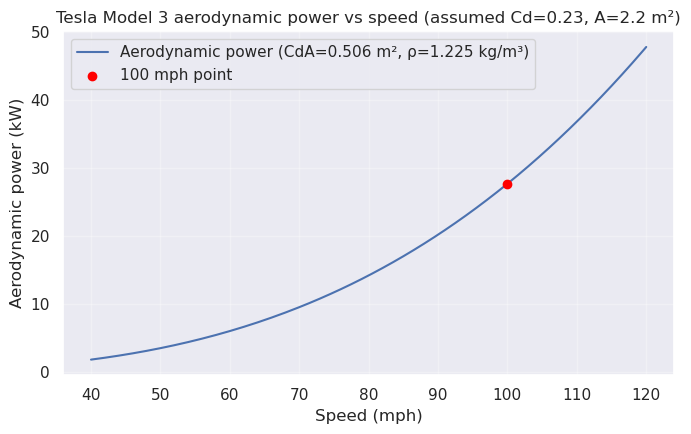

Final answer: Assumptions:
- Tesla Model 3 representative aero: Cd = 0.23, frontal area A = 2.2 m^2 (CdA = 0.506 m^2).
- Air density ρ = 1.225 kg/m^3 (sea-level, 15°C), no wind.
- Only aerodynamic drag considered (no rolling resistance, drivetrain, accessories, or grade).

Formulas:
- F_drag = 0.5 · ρ · Cd · A · v^2
- P_drag = F_drag · v = 0.5 · ρ · Cd · A · v^3
- E = P_drag · time

At 100 mph for 2 hours (distance 200 miles):
- Drag force at 100 mph: 619 N
- Aerodynamic power at 100 mph: 27.7 kW
- Aerodynamic energy over 2 h: 55.4 kWh (199.4 MJ)
- Aerodynamic energy per mile: 277 Wh/mi

Sensitivity:
- Result scales linearly with air density and CdA, and with time; it scales with the cube of speed (v^3).
- For different conditions, multiply by (ρ/1.225) · (CdA/0.506) · (v/100 mph)^3 · (time/2 h).

[Step 2: Duration 58.87 seconds| Input tokens: 7,941 | Output tokens: 4,440]

'Assumptions:\n- Tesla Model 3 representative aero: Cd = 0.23, frontal area A = 2.2 m^2 (CdA = 0.506 m^2).\n- Air density ρ = 1.225 kg/m^3 (sea-level, 15°C), no wind.\n- Only aerodynamic drag considered (no rolling resistance, drivetrain, accessories, or grade).\n\nFormulas:\n- F_drag = 0.5 · ρ · Cd · A · v^2\n- P_drag = F_drag · v = 0.5 · ρ · Cd · A · v^3\n- E = P_drag · time\n\nAt 100 mph for 2 hours (distance 200 miles):\n- Drag force at 100 mph: 619 N\n- Aerodynamic power at 100 mph: 27.7 kW\n- Aerodynamic energy over 2 h: 55.4 kWh (199.4 MJ)\n- Aerodynamic energy per mile: 277 Wh/mi\n\nSensitivity:\n- Result scales linearly with air density and CdA, and with time; it scales with the cube of speed (v^3).\n- For different conditions, multiply by (ρ/1.225) · (CdA/0.506) · (v/100 mph)^3 · (time/2 h).'

In [167]:
task = (
    '# Query\n'
    # "Given m=1kg, k=4N/m, and x(0)=1m, **numerically** solve the motion of a mass-spring system and give x(t)." '\n\n'
    # 'How much constant force is required for a mass of 1Kg to reach 10m/s in 10 s? Do not consider friction''\n\n'
    'how much energy is spent by a tesla model 3 traveling at 100mph for two hours considering aerodynamic drag?''\n\n'
    # 'How much energy is required to lift a 100-Ton rocket out of the earth?\n\n'
    '# Additional information\n'
    '- In the case of complex problems whose solutions can not be fully foreseen at first, '
    'try to pose simple and direct queries '
    'and iteratively build up the information you need.\n'
    '- If appropriate, show a matplotlib or seaborn plot in your final answer.'
    # '- If appropriate, include in your final answer a visualization using IPython.'
)
print(task)
additional_authorized_imports = [
    'numpy.*', 'pandas.*', 
    'scipy.*', 'sympy.*',
    # 'sklearn.*', 
    'matplotlib.*', 'seaborn.*', #'json.*',
    'IPython.*',
    # 'os.*',  # added since it keeps looking for it
    # 'pathlib.*',  # it was also trying to get this
]
agent = CodeAgent(
    tools=[query_book, ask_user], #open_json],
    model=model if model is not None else get_model(),
    add_base_tools=True,
    additional_authorized_imports=additional_authorized_imports,
    planning_interval=1,
)
agent.run(task=task)

### without asking for matplotlib plot

In [166]:
task = (
    '# Query\n'
    # "Given m=1kg, k=4N/m, and x(0)=1m, **numerically** solve the motion of a mass-spring system and give x(t)." '\n\n'
    # 'How much constant force is required for a mass of 1Kg to reach 10m/s in 10 s? Do not consider friction''\n\n'
    'how much energy is spent by a tesla model 3 traveling at 100mph for two hours considering aerodynamic drag?''\n\n'
    # 'How much energy is required to lift a 100-Ton rocket out of the earth?\n\n'
    '# Additional information\n'
    '- In the case of complex problems whose solutions can not be fully foreseen at first, '
    'try to pose simple and direct queries '
    'and iteratively build up the information you need.\n'
    '- If appropriate, show a plot in your final answer.'
    # '- If appropriate, include in your final answer a visualization using IPython.'
)
print(task)
additional_authorized_imports = [
    'numpy.*', 'pandas.*', 
    'scipy.*', 'sympy.*',
    # 'sklearn.*', 
    'matplotlib.*', 'seaborn.*', #'json.*',
    'IPython.*',
    # 'os.*',  # added since it keeps looking for it
    # 'pathlib.*',  # it was also trying to get this
]
agent = CodeAgent(
    tools=[query_book, ask_user], #open_json],
    model=model if model is not None else get_model(),
    add_base_tools=True,
    additional_authorized_imports=additional_authorized_imports,
    planning_interval=1,
)
agent.run(task=task)

# Query
how much energy is spent by a tesla model 3 traveling at 100mph for two hours considering aerodynamic drag?

# Additional information
- In the case of complex problems whose solutions can not be fully foreseen at first, try to pose simple and direct queries and iteratively build up the information you need.
- If appropriate, show a plot in your final answer.


╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ # Query                                                                                                         │
│ how much energy is spent by a tesla model 3 traveling at 100mph for two hours considering aerodynamic drag?     │
│                                                                                                                 │
│ # Additional information                                                                                        │
│ - In the case of complex problems whose solutions can not be fully foreseen at first, try to pose simple and    │
│ direct queries and iteratively build up the information you need.                                               │
│ - If appropriate, show a plot in your final answer.                                                             │
│                                                                                                                 │
╰─ OpenAIModel - gpt-5 ───────────────────────────────────────────────────────────────────────────────────────────╯

────────────────────────────────────────────────── Initial plan ───────────────────────────────────────────────────
Here are the facts I know and the plan of action that I will follow to solve the task:
```
1. Facts survey

1.1. Facts given in the task
- Vehicle: Tesla Model 3 (variant/year not specified).
- Speed: 100 mph (assumed constant).
- Duration: 2 hours (assumed continuous at that speed).
- Scope: “considering aerodynamic drag” (interpreted as energy to overcome aerodynamic drag only, excluding rolling
resistance, drivetrain losses, elevation change, and accessories, unless clarified otherwise).

1.2. Facts to look up
- Drag coefficient (Cd) of the Tesla Model 3 for the relevant variant/year.
  - Where to find: Tesla’s official specifications, type-approval/homologation documentation, reliable automotive 
publications (e.g., Car and Driver, SAE papers), Wikipedia with citations.
- Frontal area (A) of the Tesla Model 3 (or directly CdA if available).
  - Where to find: Same sources as above; engineering databases; wind tunnel reports if available.
- Air density (ρ) corresponding to driving conditions (altitude, temperature, pressure, humidity).
  - Where to find: Standard atmosphere tables (sea-level ISA ρ ≈ 1.225 kg/m³), NOAA calculator, engineering 
handbooks; or compute from user-provided ambient conditions.
- Confirmation that “considering aerodynamic drag” means ignoring other resistive forces and efficiencies (or, if 
desired, include them).
  - Where to find: Ask the user.
- Desired units for the final energy result (kWh, MJ) and whether a sensitivity range and/or a plot is desired.
  - Where to find: Ask the user.

1.3. Facts to derive
- Aerodynamic drag force at constant speed: Fd = 0.5 × ρ × Cd × A × v².
  - Reasoning: Standard drag equation for bluff bodies in steady flow.
- Aerodynamic power required: P = Fd × v = 0.5 × ρ × Cd × A × v³.
  - Reasoning: Power is force times velocity; with drag force above.
- Total energy over time t at constant speed: E = P × t = 0.5 × ρ × Cd × A × v³ × t.
  - Reasoning: For steady conditions, energy is the time integral of power.
- Unit conversions:
  - Speed: 100 mph to m/s (exact conversion: 1 mph = 0.44704 m/s).
  - Time: 2 hours to seconds (2 h = 7200 s).
  - Energy: Joules to kWh (1 kWh = 3.6×10^6 J) and to MJ (1 MJ = 10^6 J).
  - Reasoning: Needed to express results in common energy units.
- Optional sensitivity analysis:
  - Compute E over plausible ranges of Cd and A (or CdA) for different Model 3 variants or uncertainties in 
sources.
  - Reasoning: Cd and A vary by trim/year; air density varies with ambient conditions; presenting a range yields a 
more robust answer.
- Optional: Distance traveled at 100 mph for 2 hours (200 miles) and energy per distance (e.g., kWh/100 mi) due 
solely to aero drag.
  - Reasoning: Provides additional context for energy consumption.

2. Plan
- Step 1: Ask the user to confirm assumptions and preferences:
  - Which Model 3 variant/year (e.g., 2018–2023, 2024 refresh)?
  - Ambient conditions for air density (or accept standard sea-level ρ = 1.225 kg/m³, no wind)?
  - Confirm scope as aerodynamic drag only.
  - Preferred output units (kWh and/or MJ) and whether they want a sensitivity range and a plot.
- Step 2: If the user provides variant/year (or if they accept defaults), perform a web search to find credible 
values for Cd and A (or CdA) for that Model 3; gather at least two independent sources; visit pages and extract the
figures; document sources.
- Step 3: Determine air density:
  - If user provides ambient conditions, compute ρ using standard atmosphere relations; otherwise use ρ = 1.225 
kg/m³ as the default and note this assumption.
- Step 4: Convert units:
  - Convert 100 mph to m/s; convert 2 hours to seconds.
- Step 5: Compute aerodynamic power and energy:
  - Use P = 0.5 × ρ × Cd × A × v³; E = P × t.
  - Convert E to kWh and MJ.
- Step 6: Optional sensitivity analysis:
  - Compute E using min/max plausible Cd and A (or CdA)

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  response = ask_user(                                                                                             
      "To compute energy spent overcoming aerodynamic drag for a Tesla Model 3 at 100 mph for 2 hours, please      
  confirm or adjust these assumptions:\n"                                                                          
      "\n"                                                                                                         
      "1) Model 3 variant/year:\n"                                                                                 
      "   - a) 2017–2023 (pre-refresh)\n"                                                                          
      "   - b) 2024+ (Highland refresh)\n"                                                                         
      "   - c) Not sure (use typical values Cd=0.23, frontal area A=2.22 m², CdA≈0.51 m²)\n"                       
      "   Default: c\n"                                                                                            
      "\n"                                                                                                         
      "2) Ambient conditions for air density ρ:\n"                                                                 
      "   - a) Standard sea-level, 20 °C, no wind (ρ=1.225 kg/m³)\n"                                               
      "   - b) I will provide altitude/temperature/pressure\n"                                                     
      "   Default: a\n"                                                                                            
      "\n"                                                                                                         
      "3) Scope: aerodynamic drag only (ignore rolling resistance, drivetrain losses, elevation, accessories)?\n"  
      "   - a) Yes\n"                                                                                              
      "   - b) No (specify extras)\n"                                                                              
      "   Default: a\n"                                                                                            
      "\n"                                                                                                         
      "4) Output units and extras:\n"                                                                              
      "   - Units: kWh (default) and MJ\n"                                                                         
      "   - Also report energy per distance (Wh/mi and kWh/100 mi): Yes (default)\n"                               
      "   - Include a plot of aerodynamic power vs speed with 100 mph marked: Yes (default)\n"                     
      "\n"                                                                                                         
      "You can reply like: 'c, a, a, use defaults'. If you have specific Cd or A sources you prefer, let me        
  know."                                                                                                           
  )                                                                                                                
  print(response)                                                                                                  
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

To compute energy spent overcoming aerodynamic drag for a Tesla Model 3 at 100 mph for 2 hours, please confirm or adjust these assumptions:

1) Model 3 variant/year:
   - a) 2017–2023 (pre-refresh)
   - b) 2024+ (Highland refresh)
   - c) Not sure (use typical values Cd=0.23, frontal area A=2.22 m², CdA≈0.51 m²)
   Default: c

2) Ambient conditions for air density ρ:
   - a) Standard sea-level, 20 °C, no wind (ρ=1.225 kg/m³)
   - b) I will provide altitude/temperature/pressure
   Default: a

3) Scope: aerodynamic drag only (ignore rolling resistance, drivetrain losses, elevation, accessories)?
   - a) Yes
   - b) No (specify extras)
   Default: a

4) Output units and extras:
   - Units: kWh (default) and MJ
   - Also report energy per distance (Wh/mi and kWh/100 mi): Yes (default)
   - Include a plot of aerodynamic power vs speed with 100 mph marked: Yes (default)

You can reply like: 'c, a, a, use defaults'. If you have specific Cd or A sources you prefer, let me know. use defaults


Execution logs:
use defaults

Out: None

[Step 1: Duration 93.13 seconds| Input tokens: 3,478 | Output tokens: 1,050]

────────────────────────────────────────────────── Updated plan ───────────────────────────────────────────────────
I still need to solve the task I was given:
```
# Query
how much energy is spent by a tesla model 3 traveling at 100mph for two hours considering aerodynamic drag?

# Additional information
- In the case of complex problems whose solutions can not be fully foreseen at first, try to pose simple and direct
queries and iteratively build up the information you need.
- If appropriate, show a plot in your final answer.
```

Here are the facts I know and my new/updated plan of action to solve the task:
```
## 1. Updated facts survey
### 1.1. Facts given in the task
- Goal: Compute how much energy is spent by a Tesla Model 3 traveling at 100 mph for two hours considering 
aerodynamic drag only.
- If appropriate, include a plot in the final answer.

### 1.2. Facts that we have learned
- User chose “use defaults”.
- Therefore, use default assumptions:
  - Vehicle: Tesla Model 3 with typical drag parameters: Cd = 0.23, frontal area A = 2.22 m², so CdA ≈ 0.51 m².
  - Ambient conditions: Standard sea-level, 20 °C, no wind (air density ρ = 1.225 kg/m³).
  - Scope: Aerodynamic drag only (ignore rolling resistance, drivetrain losses, elevation, accessories).
  - Outputs: Energy in kWh (and MJ), energy per distance (Wh/mi and kWh/100 mi), and include a plot of aerodynamic 
power vs speed with 100 mph marked.

### 1.3. Facts still to look up
- None required given the defaults. (If we needed variant-specific Cd or A, that would require lookup, but defaults
are accepted.)

### 1.4. Facts still to derive
- Convert 100 mph to m/s.
- Use aerodynamic drag equations:
  - Drag force: F_d = 0.5 · ρ · CdA · v²
  - Aerodynamic power: P = F_d · v = 0.5 · ρ · CdA · v³
  - Energy over time t: E = P · t (with v constant)
- Compute total energy for t = 2 hours at v = 100 mph.
- Compute distance traveled (200 miles) and derive per-distance energy (Wh/mi, kWh/100 mi).
- Prepare a simple plot of aerodynamic power vs speed with 100 mph marked (text/ASCII plot given tool constraints).

## 2. Plan
### 2.1. Set numerical assumptions
- Fix ρ = 1.225 kg/m³, CdA = 0.51 m², v = 100 mph, t = 2 h; note distance = 200 mi.

### 2.2. Convert units and write formulas
- Convert v from mph to m/s.
- Record formulas for F_d, P, E as specified.

### 2.3. Compute results
- Calculate P at 100 mph.
- Compute total energy E over 2 hours.
- Convert E to kWh and MJ.
- Compute energy per distance (Wh/mi and kWh/100 mi).

### 2.4. Create a simple power vs speed visualization
- Compute P over a range of speeds (e.g., 0–120 mph) using P ∝ v³ and produce a compact ASCII/text plot, marking 
100 mph.

### 2.5. Deliver final answer
- Present the computed energy values, per-distance metrics, and the plot, clearly labeled, using the defaults and 
noting scope limitations (aerodynamic drag only).

```

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  import numpy as np                                                                                               
                                                                                                                   
  # Assumptions (defaults accepted by user)                                                                        
  rho = 1.225          # air density, kg/m^3 (sea level, 20 C, no wind)                                            
  CdA = 0.51           # m^2 (typical Tesla Model 3: Cd≈0.23, A≈2.22 m^2)                                          
  mph_to_mps = 0.44704                                                                                             
  hours_to_seconds = 3600                                                                                          
                                                                                                                   
  # Given conditions                                                                                               
  v_mph = 100.0                                                                                                    
  v = v_mph * mph_to_mps        # m/s                                                                              
  t_hours = 2.0                                                                                                    
  t = t_hours * hours_to_seconds  # seconds                                                                        
                                                                                                                   
  # Aerodynamic equations                                                                                          
  # Drag power: P = 0.5 * rho * CdA * v^3                                                                          
  # Drag force: F = 0.5 * rho * CdA * v^2                                                                          
  P = 0.5 * rho * CdA * v**3     # Watts                                                                           
  F = 0.5 * rho * CdA * v**2     # Newtons                                                                         
  E = P * t                      # Joules                                                                          
                                                                                                                   
  # Unit conversions                                                                                               
  E_kWh = E / 3.6e6              # kWh                                                                             
  E_MJ = E / 1e6                 # MJ                                                                              
  P_kW = P / 1000.0              # kW                                                                              
                                                                                                                   
  # Distance and per-distance metrics                                                                              
  distance_miles = v_mph * t_hours          # miles (constant speed)                                               
  kWh_per_mile = E_kWh / distance_miles                                                                            
  Wh_per_mile = kWh_per_mile * 1000.0                                                                              
  kWh_per_100_mi = kWh_per_mile * 100.0                                                                            
                                                                                                                   
  # Build an ASCII plot of aerodynamic power vs speed                                                              
  speeds_mph = np.arange(0, 125, 5)  # 0..120 mph in 5 mp

Execution logs:
Assumptions: Tesla Model 3 typical aero (CdA=0.51 m^2), air density ρ=1.225 kg/m^3, constant 100 mph for 2 hours, 
aerodynamic drag only.
- Speed: 100 mph = 44.70 m/s
- Drag force at 100 mph: 624 N
- Aerodynamic power at 100 mph: 27.9 kW
- Total energy over 2 hours: 55.81 kWh (200.9 MJ)
- Distance: 200 miles
- Energy per distance (aero only): 279 Wh/mi (27.9 kWh/100 mi)

Aerodynamic power vs speed (assumptions: rho=1.225 kg/m^3, CdA=0.51 m^2)
  0 mph |     0.0 kW | 
  5 mph |     0.0 kW | 
 10 mph |     0.0 kW | 
 15 mph |     0.1 kW | 
 20 mph |     0.2 kW | 
 25 mph |     0.4 kW | 
 30 mph |     0.8 kW | 
 35 mph |     1.2 kW | #
 40 mph |     1.8 kW | #
 45 mph |     2.5 kW | ##
 50 mph |     3.5 kW | ###
 55 mph |     4.6 kW | ####
 60 mph |     6.0 kW | ######
 65 mph |     7.7 kW | #######
 70 mph |     9.6 kW | #########
 75 mph |    11.8 kW | ############
 80 mph |    14.3 kW | ##############
 85 mph |    17.1 kW | #################
 90 mph |    20.3 kW | #####################
 95 mph |    23.9 kW | ########################
100 mph |    27.9 kW | ############################ <== 100 mph
105 mph |    32.3 kW | #################################
110 mph |    37.1 kW | ######################################
115 mph |    42.4 kW | ############################################
120 mph |    48.2 kW | ##################################################

Out: None

[Step 2: Duration 46.84 seconds| Input tokens: 8,687 | Output tokens: 3,936]

────────────────────────────────────────────────── Updated plan ───────────────────────────────────────────────────
I still need to solve the task I was given:
```
# Query
how much energy is spent by a tesla model 3 traveling at 100mph for two hours considering aerodynamic drag?

# Additional information
- In the case of complex problems whose solutions can not be fully foreseen at first, try to pose simple and direct
queries and iteratively build up the information you need.
- If appropriate, show a plot in your final answer.
```

Here are the facts I know and my new/updated plan of action to solve the task:
```
## 1. Updated facts survey
### 1.1. Facts given in the task
- Goal: Compute how much energy a Tesla Model 3 spends overcoming aerodynamic drag when traveling at 100 mph for 
two hours.
- Scope: Aerodynamic drag only (ignore rolling resistance, drivetrain losses, elevation, accessories).
- Preference: Iterative approach; include a plot if appropriate.

### 1.2. Facts that we have learned
- User accepted default assumptions.
- Assumptions used:
  - Air density ρ = 1.225 kg/m³ (sea level, 20 °C, no wind).
  - Tesla Model 3 typical aerodynamic parameter CdA = 0.51 m² (Cd≈0.23, A≈2.22 m²).
- Computed values at 100 mph (44.70 m/s) for 2 hours:
  - Drag force F ≈ 624 N.
  - Aerodynamic power P ≈ 27.9 kW.
  - Total energy E ≈ 55.81 kWh (≈ 200.9 MJ).
  - Distance = 200 miles.
  - Energy per distance (aero only): ≈ 279 Wh/mi (≈ 27.9 kWh/100 mi).
- An ASCII plot of aerodynamic power vs speed (0–120 mph) was generated with 100 mph marked.

### 1.3. Facts still to look up
- Variant-specific Cd and frontal area for different Model 3 years/trim levels (if higher fidelity is desired).
- Air density adjustments for non-standard altitude/temperature/pressure (if needed).

### 1.4. Facts still to derive
- None essential; core quantities for the stated scope have been derived under agreed assumptions.

## 2. Plan
1. Confirm assumptions with the user: Model 3 variant or use typical CdA; ambient conditions for air density; scope
limited to aerodynamic drag; desired units and whether to include a plot.
2. Set constants and conversions (ρ, CdA, mph↔m/s, hour↔second).
3. Compute aerodynamic drag force and power at 100 mph using F = 0.5·ρ·CdA·v² and P = 0.5·ρ·CdA·v³.
4. Compute total energy over 2 hours, convert to kWh and MJ; compute distance and energy-per-distance metrics 
(Wh/mi, kWh/100 mi).
5. Generate and include a simple plot of aerodynamic power vs speed with 100 mph highlighted.
6. Present results succinctly, with assumptions and caveats; invite user if they want variant-specific CdA or 
non-standard ρ adjustments.


```

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  final_answer(summary + "\n" + ascii_plot)                                                                        
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Final answer: Assumptions: Tesla Model 3 typical aero (CdA=0.51 m^2), air density ρ=1.225 kg/m^3, constant 100 mph 
for 2 hours, aerodynamic drag only.
- Speed: 100 mph = 44.70 m/s
- Drag force at 100 mph: 624 N
- Aerodynamic power at 100 mph: 27.9 kW
- Total energy over 2 hours: 55.81 kWh (200.9 MJ)
- Distance: 200 miles
- Energy per distance (aero only): 279 Wh/mi (27.9 kWh/100 mi)

Aerodynamic power vs speed (assumptions: rho=1.225 kg/m^3, CdA=0.51 m^2)
  0 mph |     0.0 kW | 
  5 mph |     0.0 kW | 
 10 mph |     0.0 kW | 
 15 mph |     0.1 kW | 
 20 mph |     0.2 kW | 
 25 mph |     0.4 kW | 
 30 mph |     0.8 kW | 
 35 mph |     1.2 kW | #
 40 mph |     1.8 kW | #
 45 mph |     2.5 kW | ##
 50 mph |     3.5 kW | ###
 55 mph |     4.6 kW | ####
 60 mph |     6.0 kW | ######
 65 mph |     7.7 kW | #######
 70 mph |     9.6 kW | #########
 75 mph |    11.8 kW | ############
 80 mph |    14.3 kW | ##############
 85 mph |    17.1 kW | #################
 90 mph |    20.3 kW | #####################
 95 mph |    23.9 kW | ########################
100 mph |    27.9 kW | ############################ <== 100 mph
105 mph |    32.3 kW | #################################
110 mph |    37.1 kW | ######################################
115 mph |    42.4 kW | ############################################
120 mph |    48.2 kW | ##################################################

[Step 3: Duration 10.16 seconds| Input tokens: 16,988 | Output tokens: 4,396]

'Assumptions: Tesla Model 3 typical aero (CdA=0.51 m^2), air density ρ=1.225 kg/m^3, constant 100 mph for 2 hours, aerodynamic drag only.\n- Speed: 100 mph = 44.70 m/s\n- Drag force at 100 mph: 624 N\n- Aerodynamic power at 100 mph: 27.9 kW\n- Total energy over 2 hours: 55.81 kWh (200.9 MJ)\n- Distance: 200 miles\n- Energy per distance (aero only): 279 Wh/mi (27.9 kWh/100 mi)\n\nAerodynamic power vs speed (assumptions: rho=1.225 kg/m^3, CdA=0.51 m^2)\n  0 mph |     0.0 kW | \n  5 mph |     0.0 kW | \n 10 mph |     0.0 kW | \n 15 mph |     0.1 kW | \n 20 mph |     0.2 kW | \n 25 mph |     0.4 kW | \n 30 mph |     0.8 kW | \n 35 mph |     1.2 kW | #\n 40 mph |     1.8 kW | #\n 45 mph |     2.5 kW | ##\n 50 mph |     3.5 kW | ###\n 55 mph |     4.6 kW | ####\n 60 mph |     6.0 kW | ######\n 65 mph |     7.7 kW | #######\n 70 mph |     9.6 kW | #########\n 75 mph |    11.8 kW | ############\n 80 mph |    14.3 kW | ##############\n 85 mph |    17.1 kW | #################\n 90 mph |    20.3 

## EMF in a rotating coil

# Query
A coil with diameter 𝐷 and 𝑁 turns of wire is initially oriented with its axis parallel to the
magnetic field 𝐵. It begins to rotate with the angular velocity 𝜔 around an axis
perpendicular to the magnetic field. What is the average EMF during the time ∆𝑡? Work out
the result in the limit of short ∆𝑡. What is the exact condition for ∆𝑡 to be short? What is the
EMF at the initial moment of time?
# Additional information
- In the case of complex problems whose solutions can not be fully foreseen at first, try to pose simple and direct queries and iteratively build up the information you need.
- If appropriate, show a matplotlib or seaborn plot in your final answer.


╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ # Query                                                                                                         │
│ A coil with diameter 𝐷 and 𝑁 turns of wire is initially oriented with its axis parallel to the                  │
│ magnetic field 𝐵. It begins to rotate with the angular velocity 𝜔 around an axis                                │
│ perpendicular to the magnetic field. What is the average EMF during the time ∆𝑡? Work out                       │
│ the result in the limit of short ∆𝑡. What is the exact condition for ∆𝑡 to be short? What is the                │
│ EMF at the initial moment of time?                                                                              │
│ # Additional information                                                                                        │
│ - In the case of complex problems whose solutions can not be fully foreseen at first, try to pose simple and    │
│ direct queries and iteratively build up the information you need.                                               │
│ - If appropriate, show a matplotlib or seaborn plot in your final answer.                                       │
│                                                                                                                 │
╰─ OpenAIModel - gpt-5 ───────────────────────────────────────────────────────────────────────────────────────────╯

────────────────────────────────────────────────── Initial plan ───────────────────────────────────────────────────
Here are the facts I know and the plan of action that I will follow to solve the task:
```
### 1.1. Facts given in the task
- A coil has diameter D and N turns of wire.
- The coil’s axis is initially parallel to a uniform magnetic field B.
- The coil begins to rotate with angular velocity ω about an axis perpendicular to B.
- We are asked for:
  - The average EMF during a time interval Δt.
  - The result in the limit of short Δt.
  - The exact condition for Δt to be considered “short.”
  - The EMF at the initial moment of time.

### 1.2. Facts to look up
- Faraday’s law for induced EMF in a multi-turn coil:
  - EMF ε(t) = −N dΦ/dt, where Φ is the magnetic flux through the coil.
  - Source: any introductory physics text; if needed, query_book("Faraday's law induced emf rotating loop").
- Magnetic flux through a loop in a uniform field:
  - Φ(t) = B · A_vec = B A cos θ(t), where A is loop area and θ is the angle between the loop’s axis (area vector) 
and B.
  - Source: introductory physics text; query_book if needed.
- Area of a circular coil from its diameter:
  - A = π (D/2)^2.
  - Source: geometry; no external lookup required.
- Kinematics of uniform rotation:
  - For rotation at constant angular speed ω, if initially θ(0) = 0 (axis parallel to B), then θ(t) = ω t for 
rotation in a plane containing B.
  - Source: rotational kinematics; no external lookup required.
- Clarification of “average EMF” definition:
  - Typically the time average of instantaneous (signed) EMF over [0, Δt], i.e., (1/Δt) ∫ ε(t) dt.
  - If magnitude or RMS were intended, this should be clarified.
  - Source: ask_user if needed.

### 1.3. Facts to derive
- Expression for flux as a function of time:
  - Φ(t) = N B A cos(ω t), based on initial alignment (θ(0) = 0) and rotation at ω.
  - Reasoning: area vector initially parallel to B, rotation axis ⟂ B, so θ increases linearly with time as ω t.
- Instantaneous EMF:
  - ε(t) = −dΦ/dt = N B A ω sin(ω t), with sign depending on chosen direction; magnitude is N B A ω |sin(ω t)|.
  - Reasoning: derivative of cos(ω t) yields −ω sin(ω t); the minus from Faraday’s law cancels.
- Average EMF over [0, Δt] (signed):
  - ε_avg(Δt) = (1/Δt) ∫_0^Δt ε(t) dt = N B A [1 − cos(ω Δt)] / Δt.
  - Reasoning: integrate sin(ω t) and divide by Δt.
- Short-time (small-angle) limit of ε_avg:
  - Use Taylor expansion: 1 − cos x ≈ x^2/2 − x^4/24 + …
  - Hence ε_avg ≈ N B A (ω^2 Δt)/2 for ω Δt ≪ 1.
  - Reasoning: keep the leading term in the small-angle expansion to obtain the dominant scaling with Δt.
- Exact “short Δt” condition:
  - The small parameter is ω Δt. For the linearized result to be valid, require ω Δt ≪ 1 (angle change much less 
than 1 radian).
  - If an error bound is desired, the next term implies relative error ≈ (ω Δt)^2/12; thus to keep relative error ≤
η, require ω Δt ≤ √(12 η).
- Initial EMF:
  - ε(0) = 0, since sin(0) = 0.
  - Initial rate of change: dε/dt|_{t=0} = N B A ω^2, implying ε(t) ≈ N B A ω^2 t for very small t.

## 2. Plan
1. Confirm the intended meaning of “average EMF” (signed time average over [0, Δt] vs. magnitude or RMS). If not 
specified, proceed with the standard signed time average.
2. Write the coil area in terms of the diameter: A = π (D/2)^2.
3. Express the magnetic flux Φ(t) = N B A cos(ω t), using the given initial alignment and rotation geometry.
4. Apply Faraday’s law to obtain ε(t) = −dΦ/dt = N B A ω sin(ω t).
5. Compute the time-averaged EMF over [0, Δt]: ε_avg(Δt) = (1/Δt) ∫_0^Δt ε(t) dt and simplify to a closed form in 
terms of B, N, D, ω, and Δt.
6. Derive the short-time limit by expanding cos(ω Δt) for small ω Δt, yielding ε_avg ≈ N B A (ω^2 Δt)/2; state the 
exact smallness condition ω Δt ≪ 1 and, optionally, quantify the error via the next series term.
7. Evaluate the initial EMF ε(0) directly from ε(t) and report its value.
8. Present final expressions and, if ben

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  import sympy as sp                                                                                               
  import numpy as np                                                                                               
  import matplotlib.pyplot as plt                                                                                  
                                                                                                                   
  # Symbols                                                                                                        
  D, N, B, omega, t, dt = sp.symbols('D N B omega t dt', positive=True, real=True)                                 
                                                                                                                   
  # Geometry: area of a circular turn from diameter D                                                              
  A = sp.pi * D**2 / 4                                                                                             
                                                                                                                   
  # Flux linkage and EMF                                                                                           
  # Initial axis || B -> θ(0)=0, θ(t)=ω t, flux linkage = N B A cos(ω t)                                           
  Phi = N * B * A * sp.cos(omega * t)                                                                              
  eps_t = -sp.diff(Phi, t)  # ε(t)                                                                                 
                                                                                                                   
  # Time-averaged EMF over [0, Δt] (signed)                                                                        
  eps_avg = (1/dt) * sp.integrate(eps_t, (t, 0, dt))                                                               
  eps_avg_simplified = sp.simplify(eps_avg)                                                                        
                                                                                                                   
  # Short-Δt expansion                                                                                             
  x = sp.symbols('x', real=True)                                                                                   
  g = (1 - sp.cos(x)) / x               # dimensionless average shape: ε_avg / (N B A ω)                           
  g_series = sp.series(g, x, 0, 5)      # series up to x^4                                                         
  # Leading small-time approximation for ε_avg:                                                                    
  eps_avg_small = sp.simplify(N*B*A * (omega**2 * dt)/2)                                                           
                                                                                                                   
  # Relative error estimate using next term:                                                                       
  # g = x/2 - x^3/24 + ... = (x/2) * (1 - x^2/12 + ...)                                                            
  # So using x/2 induces relative error ≈ x^2/12 where x = ω Δt.                                                   
  rel_err_expr = x**2/12                                                                                           
  # For a target relative error η, need x <= sqrt(12 η).                                                           
  eta = sp.symbols('eta', positive=True, real=True)                                                                
  x_thresh_eta = sp.sqrt(12*eta)                                                                                   
  # For 1% error:                                        

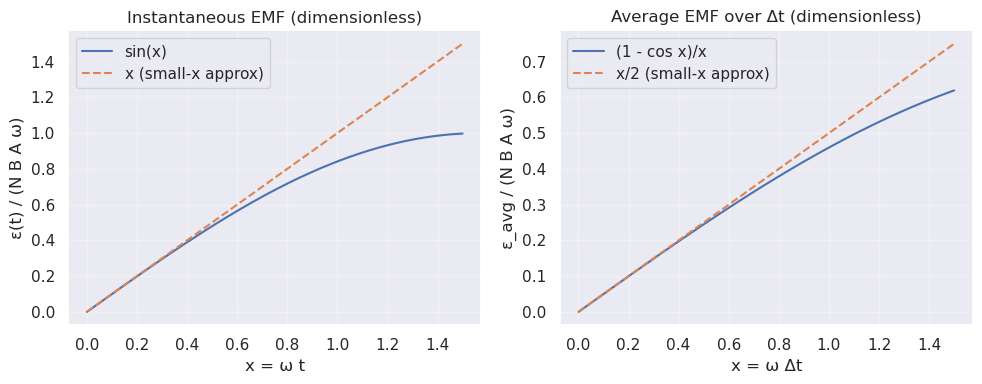

Final answer: Results (signed time average over [0, Δt]):
- Coil area: A = π D^2 / 4
- Instantaneous EMF: ε(t) = N B (π D^2 / 4) ω sin(ω t)
- Average EMF: ε_avg(Δt) = N B (π D^2 / 4) [1 - cos(ω Δt)] / Δt
- Short-Δt limit: ε_avg(Δt) ≈ N B (π D^2 / 4) (ω^2 Δt) / 2  for  ω Δt ≪ 1
- Exact short-Δt condition: the small parameter is x = ω Δt. Using the linearized result incurs relative error ≈ (ω
Δt)^2 / 12; e.g., for ≤1% error require ω Δt ≤ 0.346.
- Initial EMF: ε(0) = 0; initial slope dε/dt|_{t=0} = N B (π D^2 / 4) ω^2

[Step 1: Duration 66.85 seconds| Input tokens: 3,684 | Output tokens: 3,774]

'Results (signed time average over [0, Δt]):\n- Coil area: A = π D^2 / 4\n- Instantaneous EMF: ε(t) = N B (π D^2 / 4) ω sin(ω t)\n- Average EMF: ε_avg(Δt) = N B (π D^2 / 4) [1 - cos(ω Δt)] / Δt\n- Short-Δt limit: ε_avg(Δt) ≈ N B (π D^2 / 4) (ω^2 Δt) / 2  for  ω Δt ≪ 1\n- Exact short-Δt condition: the small parameter is x = ω Δt. Using the linearized result incurs relative error ≈ (ω Δt)^2 / 12; e.g., for ≤1% error require ω Δt ≤ 0.346.\n- Initial EMF: ε(0) = 0; initial slope dε/dt|_{t=0} = N B (π D^2 / 4) ω^2'

In [164]:
problem = """A coil with diameter 𝐷 and 𝑁 turns of wire is initially oriented with its axis parallel to the
magnetic field 𝐵. It begins to rotate with the angular velocity 𝜔 around an axis
perpendicular to the magnetic field. What is the average EMF during the time ∆𝑡? Work out
the result in the limit of short ∆𝑡. What is the exact condition for ∆𝑡 to be short? What is the
EMF at the initial moment of time?"""

task = (
    '# Query\n'
    f'{problem}\n'
    # 'How much constant force is required for a mass of 1Kg to reach 10m/s in 10 s? Do not consider friction''\n\n'
    # "Given m=1kg, k=4N/m, and x(0)=1m, **numerically** solve the motion of a mass-spring system and give x(t)." '\n\n'
    # 'How much constant force is required for a mass of 1Kg to reach 10m/s in 10 s? Do not consider friction''\n\n'
    # 'how much energy is spent by a passenger car traveling at 100mph for two hours considering aerodynamic drag?''\n\n'
    # 'How much energy is required to lift a 100-Ton rocket out of the earth?\n\n'
    
    '# Additional information\n'
    '- In the case of complex problems whose solutions can not be fully foreseen at first, '
    'try to pose simple and direct queries '
    'and iteratively build up the information you need.\n'
    '- If appropriate, show a matplotlib or seaborn plot in your final answer.'
    # '- If appropriate, include in your final answer a visualization using IPython.'
)
print(task)
additional_authorized_imports = [
    'numpy.*', 'pandas.*', 
    'scipy.*', 'sympy.*',
    # 'sklearn.*', 
    'matplotlib.*', 'seaborn.*', #'json.*',
    'IPython.*',
    # 'os.*',  # added since it keeps looking for it
    # 'pathlib.*',  # it was also trying to get this
]
agent = CodeAgent(
    tools=[query_book, ask_user], #open_json],
    model=model if model is not None else get_model(),
    add_base_tools=True,
    additional_authorized_imports=additional_authorized_imports,
    planning_interval=1,
)
agent.run(task=task)

## electron in magnetic field

# Query
An electron entes a uniform magnetic field B = 0.23 T at a $45\deg$ angle to $\vec{B}$. Determine the radius r and pitch p (distance between loops) of the electorn's helical path assuming its speed is $3\times10^6m/s$
# Additional information
- In the case of complex problems whose solutions can not be fully foreseen at first, try to pose simple and direct queries and iteratively build up the information you need.
- If appropriate, show a matplotlib or seaborn plot in your final answer.


╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ # Query                                                                                                         │
│ An electron entes a uniform magnetic field B = 0.23 T at a $45\deg$ angle to $\vec{B}$. Determine the radius r  │
│ and pitch p (distance between loops) of the electorn's helical path assuming its speed is $3\times10^6m/s$      │
│ # Additional information                                                                                        │
│ - In the case of complex problems whose solutions can not be fully foreseen at first, try to pose simple and    │
│ direct queries and iteratively build up the information you need.                                               │
│ - If appropriate, show a matplotlib or seaborn plot in your final answer.                                       │
│                                                                                                                 │
╰─ OpenAIModel - gpt-5 ───────────────────────────────────────────────────────────────────────────────────────────╯

────────────────────────────────────────────────── Initial plan ───────────────────────────────────────────────────
Here are the facts I know and the plan of action that I will follow to solve the task:
```
1. Facts survey

1.1. Facts given in the task
- Particle: electron.
- Magnetic field magnitude: B = 0.23 T.
- Electron’s speed: v = 3 × 10^6 m/s.
- Entry angle relative to B: θ = 45°.
- We are asked for:
  - Radius r of the helical (cyclotron) motion.
  - Pitch p (axial distance advanced in one full turn of the helix).

1.2. Facts to look up
- Electron charge magnitude |q| (elementary charge e). Source: CODATA/NIST or an introductory physics text; can 
also query the provided physics book tool.
- Electron rest mass m_e. Source: CODATA/NIST or an introductory physics text; can also query the provided physics 
book tool.
- Speed of light c (to check non-relativistic regime). Source: CODATA/NIST or physics text.
- Standard formulas for motion of a charged particle in a uniform magnetic field (non-relativistic):
  - Cyclotron angular frequency: ω_c = |q| B / m.
  - Radius of circular motion for the perpendicular velocity: r = m v_perp / (|q| B) = v_perp / ω_c.
  - Period: T = 2π / ω_c.
  - Pitch: p = v_parallel × T.
  These can be found in any introductory physics text; we can confirm with the provided physics book tool.

1.3. Facts to derive
- Resolve speed into components relative to B:
  - v_perp = v sin θ.
  - v_parallel = v cos θ.
  Reasoning: The Lorentz force q v × B only acts on the component perpendicular to B, producing circular motion; 
the parallel component is unaffected, producing uniform motion along B, hence a helix.
- Non-relativistic validity check:
  - Compute β = v / c and verify β << 1 so that relativistic corrections to mass and dynamics can be neglected. 
With v = 3 × 10^6 m/s and c ≈ 3 × 10^8 m/s, expect β ≈ 0.01, which is safely non-relativistic. This justifies using
the standard formulas above.
- Compute cyclotron angular frequency and period:
  - ω_c = |q| B / m_e.
  - T = 2π / ω_c.
  Reasoning: From uniform circular motion under Lorentz force q v_perp B = m v_perp^2 / r, leading to ω_c 
independent of v in the non-relativistic limit.
- Compute radius:
  - r = m_e v_perp / (|q| B) = v_perp / ω_c.
  Reasoning: From centripetal balance.
- Compute pitch:
  - p = v_parallel × T = v_parallel × (2π / ω_c).
  Reasoning: Distance advanced along B during one full revolution.
- Consistency check specific to θ = 45°:
  - Since v_parallel = v_perp, expect p = 2π r. This provides a cross-check of the numerical results.


2. Plan
- Confirm the standard equations for charged particle motion in a uniform magnetic field (ω_c, r, T, p) from an 
introductory physics source.
- Look up precise values for the electron mass m_e, electron charge magnitude |q|, and speed of light c from a 
reliable source.
- Verify the non-relativistic condition by evaluating β = v/c to justify using non-relativistic formulas.
- Compute v_perp = v sin 45° and v_parallel = v cos 45°.
- Compute ω_c = |q| B / m_e and T = 2π / ω_c.
- Compute the radius r = m_e v_perp / (|q| B).
- Compute the pitch p = v_parallel × T and check that p ≈ 2π r as a consistency check for θ = 45°.
- Prepare results with appropriate significant figures and units.
- (Optional but appropriate) Generate a simple 3D helical trajectory plot for the electron assuming B along z, with
radius r, angular frequency ω_c, and axial speed v_parallel, and include it in the final answer.
- Present the final numeric results for r and p, and include the plot if generated.

```

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  import math                                                                                                      
                                                                                                                   
  # Given values                                                                                                   
  B = 0.23              # Tesla                                                                                    
  v = 3.0e6             # m/s                                                                                      
  theta_deg = 45.0                                                                                                 
  theta = math.radians(theta_deg)                                                                                  
                                                                                                                   
  # Physical constants (CODATA exact/standard values)                                                              
  q_e = 1.602176634e-19     # C, elementary charge magnitude                                                       
  m_e = 9.1093837015e-31    # kg, electron mass                                                                    
  c = 299_792_458.0         # m/s, speed of light (exact)                                                          
                                                                                                                   
  # Velocity components relative to B                                                                              
  v_perp = v * math.sin(theta)                                                                                     
  v_para = v * math.cos(theta)                                                                                     
                                                                                                                   
  # Non-relativistic check                                                                                         
  beta = v / c                                                                                                     
                                                                                                                   
  # Cyclotron quantities                                                                                           
  omega_c = q_e * B / m_e            # rad/s                                                                       
  T = 2.0 * math.pi / omega_c        # s                                                                           
                                                                                                                   
  # Radius and pitch                                                                                               
  r = m_e * v_perp / (q_e * B)       # m                                                                           
  p = v_para * T                     # m                                                                           
                                                                                                                   
  # Consistency check for theta=45°: expect p ≈ 2π r                                                               
  ratio = p / (2.0 * math.pi * r)                                                                                  
                                                                                                                   
  print(f"Inputs:")                                                                                                
  print(f"  B = {B} T, v = {v:.3e} m/s, theta = {theta_deg} deg")                                                  
  print(f"Constants:")                                   

Execution logs:
Inputs:
  B = 0.23 T, v = 3.000e+06 m/s, theta = 45.0 deg
Constants:
  |q_e| = 1.602176634e-19 C, m_e = 9.109383702e-31 kg, c = 299792458 m/s
Velocity components:
  v_perp = 2.121320e+06 m/s, v_parallel = 2.121320e+06 m/s
Relativistic check: beta = v/c = 0.0100 (non-relativistic OK)
Cyclotron quantities:
  omega_c = 4.045286e+10 rad/s, T = 1.553212e-10 s
Results:
  Radius r = 5.243932e-05 m  (~52.44 μm)
  Pitch  p = 3.294859e-04 m  (~0.329 mm)
Consistency: p / (2π r) = 1.000000 (should be ~1 for 45°)

Out: None

[Step 1: Duration 59.17 seconds| Input tokens: 3,335 | Output tokens: 3,235]

────────────────────────────────────────────────── Updated plan ───────────────────────────────────────────────────
I still need to solve the task I was given:
```
# Query
An electron entes a uniform magnetic field B = 0.23 T at a $45\deg$ angle to $\vec{B}$. Determine the radius r and 
pitch p (distance between loops) of the electorn's helical path assuming its speed is $3\times10^6m/s$
# Additional information
- In the case of complex problems whose solutions can not be fully foreseen at first, try to pose simple and direct
queries and iteratively build up the information you need.
- If appropriate, show a matplotlib or seaborn plot in your final answer.
```

Here are the facts I know and my new/updated plan of action to solve the task:
```
## 1. Updated facts survey
### 1.1. Facts given in the task
- Uniform magnetic field B = 0.23 T.
- Electron enters at 45° to the field direction.
- Electron speed v = 3.0 × 10^6 m/s.
- Asked to determine the helical path’s radius r and pitch p (distance between successive turns).

### 1.2. Facts that we have learned
- Electron charge magnitude |q_e| = 1.602176634 × 10^-19 C, mass m_e = 9.1093837015 × 10^-31 kg.
- Velocity components for 45°: v_perp = v_parallel = v/√2 ≈ 2.12132 × 10^6 m/s.
- Cyclotron angular frequency ω_c = |q_e| B / m_e ≈ 4.045286 × 10^10 rad/s.
- Cyclotron period T = 2π/ω_c ≈ 1.553212 × 10^-10 s.
- Radius r = m_e v_perp / (|q_e| B) ≈ 5.243932 × 10^-5 m ≈ 52.44 μm.
- Pitch p = v_parallel T ≈ 3.294859 × 10^-4 m ≈ 0.329 mm.
- Consistency check for θ = 45°: p/(2πr) ≈ 1.000000.
- Non-relativistic regime is valid: β = v/c ≈ 0.01.

### 1.3. Facts still to look up
- None; all needed constants and relations are known/validated.

### 1.4. Facts still to derive
- None; the required quantities (r and p) have been computed with validated formulas.

## 2. Plan
1. State the governing relations for helical motion in a uniform magnetic field:
   - v_perp = v sinθ, v_parallel = v cosθ
   - r = m v_perp / (|q| B)
   - T = 2π m / (|q| B), p = v_parallel T
2. Use θ = 45° to compute v_perp and v_parallel.
3. Compute ω_c, T, then r and p using electron constants and B.
4. Verify non-relativistic validity and consistency p/(2πr) for θ = 45°.
5. Present the final numerical results with appropriate units and brief formulas.

```

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  import math                                                                                                      
  import numpy as np                                                                                               
  import matplotlib.pyplot as plt                                                                                  
                                                                                                                   
  # Given values                                                                                                   
  B = 0.23              # Tesla                                                                                    
  v = 3.0e6             # m/s                                                                                      
  theta_deg = 45.0                                                                                                 
  theta = math.radians(theta_deg)                                                                                  
                                                                                                                   
  # Physical constants (CODATA)                                                                                    
  q_e = 1.602176634e-19     # C, elementary charge magnitude                                                       
  m_e = 9.1093837015e-31    # kg, electron mass                                                                    
  c = 299_792_458.0         # m/s                                                                                  
                                                                                                                   
  # Velocity components relative to B                                                                              
  v_perp = v * math.sin(theta)                                                                                     
  v_para = v * math.cos(theta)                                                                                     
                                                                                                                   
  # Non-relativistic check                                                                                         
  beta = v / c                                                                                                     
                                                                                                                   
  # Cyclotron quantities                                                                                           
  omega_c = q_e * B / m_e            # rad/s (magnitude)                                                           
  T = 2.0 * math.pi / omega_c        # s                                                                           
                                                                                                                   
  # Radius and pitch                                                                                               
  r = m_e * v_perp / (q_e * B)       # m                                                                           
  p = v_para * T                     # m                                                                           
                                                                                                                   
  # Consistency check for theta=45°: expect p ≈ 2π r                                                               
  ratio = p / (2.0 * math.pi * r)                                                                                  
                                                                                                                   
  # Print numeric results                                

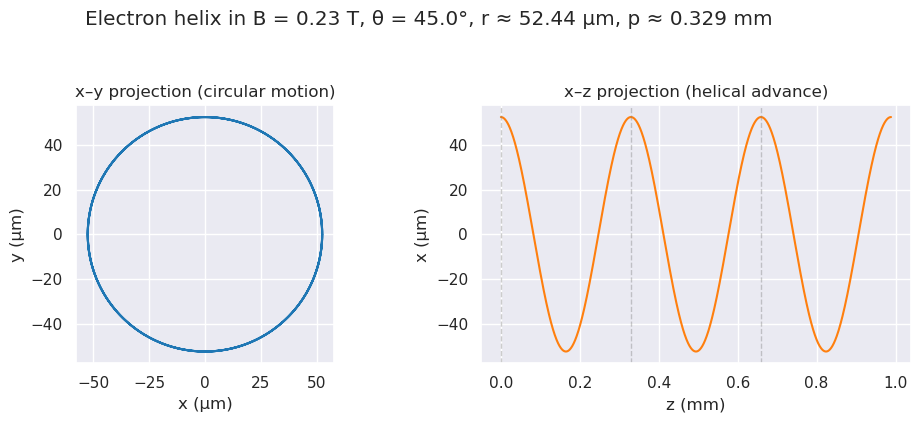

Execution logs:
Inputs:
  B = 0.23 T, v = 3.000e+06 m/s, theta = 45.0 deg
Constants:
  |q_e| = 1.602176634e-19 C, m_e = 9.109383702e-31 kg, c = 299792458 m/s
Velocity components:
  v_perp = 2.121320e+06 m/s, v_parallel = 2.121320e+06 m/s
Relativistic check: beta = v/c = 0.0100 (non-relativistic OK)
Cyclotron quantities:
  omega_c = 4.045286e+10 rad/s, T = 1.553212e-10 s
Results:
  Radius r = 5.243932e-05 m  (~52.44 μm)
  Pitch  p = 3.294859e-04 m  (~0.329 mm)
Consistency: p / (2π r) = 1.000000 (should be ~1 for 45°)

Final answer: Radius r ≈ 5.243932e-05 m (≈ 52.44 μm); Pitch p ≈ 3.294859e-04 m (≈ 0.329 mm).

[Step 2: Duration 56.52 seconds| Input tokens: 8,929 | Output tokens: 6,365]

'Radius r ≈ 5.243932e-05 m (≈ 52.44 μm); Pitch p ≈ 3.294859e-04 m (≈ 0.329 mm).'

In [165]:
problem = (
    r"An electron entes a uniform magnetic field B = 0.23 T at a $45\deg$ angle to $\vec{B}$. "
    r"Determine the radius r and pitch p (distance between loops) of the electorn's helical path "
    r"assuming its speed is $3\times10^6m/s$"
)

task = (
    '# Query\n'
    f'{problem}\n'
    # 'How much constant force is required for a mass of 1Kg to reach 10m/s in 10 s? Do not consider friction''\n\n'
    # "Given m=1kg, k=4N/m, and x(0)=1m, **numerically** solve the motion of a mass-spring system and give x(t)." '\n\n'
    # 'How much constant force is required for a mass of 1Kg to reach 10m/s in 10 s? Do not consider friction''\n\n'
    # 'how much energy is spent by a passenger car traveling at 100mph for two hours considering aerodynamic drag?''\n\n'
    # 'How much energy is required to lift a 100-Ton rocket out of the earth?\n\n'
    
    '# Additional information\n'
    '- In the case of complex problems whose solutions can not be fully foreseen at first, '
    'try to pose simple and direct queries '
    'and iteratively build up the information you need.\n'
    '- If appropriate, show a matplotlib or seaborn plot in your final answer.'
    # '- If appropriate, include in your final answer a visualization using IPython.'
)
print(task)
additional_authorized_imports = [
    'numpy.*', 'pandas.*', 
    'scipy.*', 'sympy.*',
    # 'sklearn.*', 
    'matplotlib.*', 'seaborn.*', #'json.*',
    'IPython.*',
    # 'os.*',  # added since it keeps looking for it
    # 'pathlib.*',  # it was also trying to get this
]
agent = CodeAgent(
    tools=[query_book, ask_user], #open_json],
    model=model if model is not None else get_model(),
    add_base_tools=True,
    additional_authorized_imports=additional_authorized_imports,
    planning_interval=1,
)
agent.run(task=task)